In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data1 = pd.read_csv('/content/drive/MyDrive/code/code/dataAir_mixavg.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data1

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1760 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1761 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1762 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1763 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1764 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1760     79           1009.24    120.0      9.0  
1761     72           1009.24    170.0      7.0  
1762     62           1009.24    120.0     13.0  
1763     62           1009.24    120.0     13.0  
1764     59           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1765 non-null   float64       
 2   co                1765 non-null   float64       
 3   no                1765 non-null   float64       
 4   no2               1765 non-null   float64       
 5   nox               1765 non-null   float64       
 6   pm25              1708 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [9]:
data2=data1.sort_values('date').reset_index(drop=True).copy()
data2

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1760 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1761 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1762 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1763 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1764 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1760     79           1009.24    120.0      9.0  
1761     72           1009.24    170.0      7.0  
1762     62           1009.24    120.0     13.0  
1763     62           1009.24    120.0     13.0  
1764     59           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [10]:
y_col='pm25'

In [11]:
data2.dropna(subset=[y_col], inplace=True)
data2=data2.reset_index(drop=True)
data2

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1703 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1704 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1705 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1706 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1707 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1703     79           1009.24    120.0      9.0  
1704     72           1009.24    170.0      7.0  
1705     62           1009.24    120.0     13.0  
1706     62           1009.24    120.0     13.0  
1707     59           1009.24      NaN      NaN  

[1708 rows x 12 columns]

In [12]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [13]:
date_parts(data2)

In [14]:
data2

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1703 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1704 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1705 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1706 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1707 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  year  month  day   day_name  
0        70           1009.40    100.0      9.0  2018      1    1     Monday  
1        67           1009.40    120.0      4.0  2018      1    2    Tuesday  
2        66           1009.40     60.0      4.0  2018      1    3  Wednesday  
3        64           1009.40    330.0      6.0  2018      1    4   Thursday  
4        63           1009.40      NaN      NaN  2018      1    5     Friday  
...     ...               ...      ...      ...   ...    ...  ...        ...  
1703     79           1009.24    120.0      9.0  2022     10   27   Thursday  
1704     72           1009.24    170.0      7.0  2022     10   28     Friday  
1705     62           1009.24    120.0     13.0  2022     10   29   Saturday  
1706     62           1009.24    120.0     13.0  2022     10   30     Sunday  
1707     59           1009.24      NaN      NaN  2022     10   31     Monday  

[1708 rows x 16 columns]

In [15]:
data2.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [16]:
df1=data2[['date', 'year', 'month', 'day', 'day_name', y_col]]
df1

date  year  month  day   day_name       pm25
0    2018-01-01  2018      1    1     Monday  21.000000
1    2018-01-02  2018      1    2    Tuesday  26.000000
2    2018-01-03  2018      1    3  Wednesday  38.000000
3    2018-01-04  2018      1    4   Thursday  39.000000
4    2018-01-05  2018      1    5     Friday  51.000000
...         ...   ...    ...  ...        ...        ...
1703 2022-10-27  2022     10   27   Thursday  14.333333
1704 2022-10-28  2022     10   28     Friday  17.000000
1705 2022-10-29  2022     10   29   Saturday  18.333333
1706 2022-10-30  2022     10   30     Sunday  29.000000
1707 2022-10-31  2022     10   31     Monday  35.666667

[1708 rows x 6 columns]

In [17]:
df1=df1.set_index('date')
df1

year  month  day   day_name       pm25
date                                              
2018-01-01  2018      1    1     Monday  21.000000
2018-01-02  2018      1    2    Tuesday  26.000000
2018-01-03  2018      1    3  Wednesday  38.000000
2018-01-04  2018      1    4   Thursday  39.000000
2018-01-05  2018      1    5     Friday  51.000000
...          ...    ...  ...        ...        ...
2022-10-27  2022     10   27   Thursday  14.333333
2022-10-28  2022     10   28     Friday  17.000000
2022-10-29  2022     10   29   Saturday  18.333333
2022-10-30  2022     10   30     Sunday  29.000000
2022-10-31  2022     10   31     Monday  35.666667

[1708 rows x 5 columns]

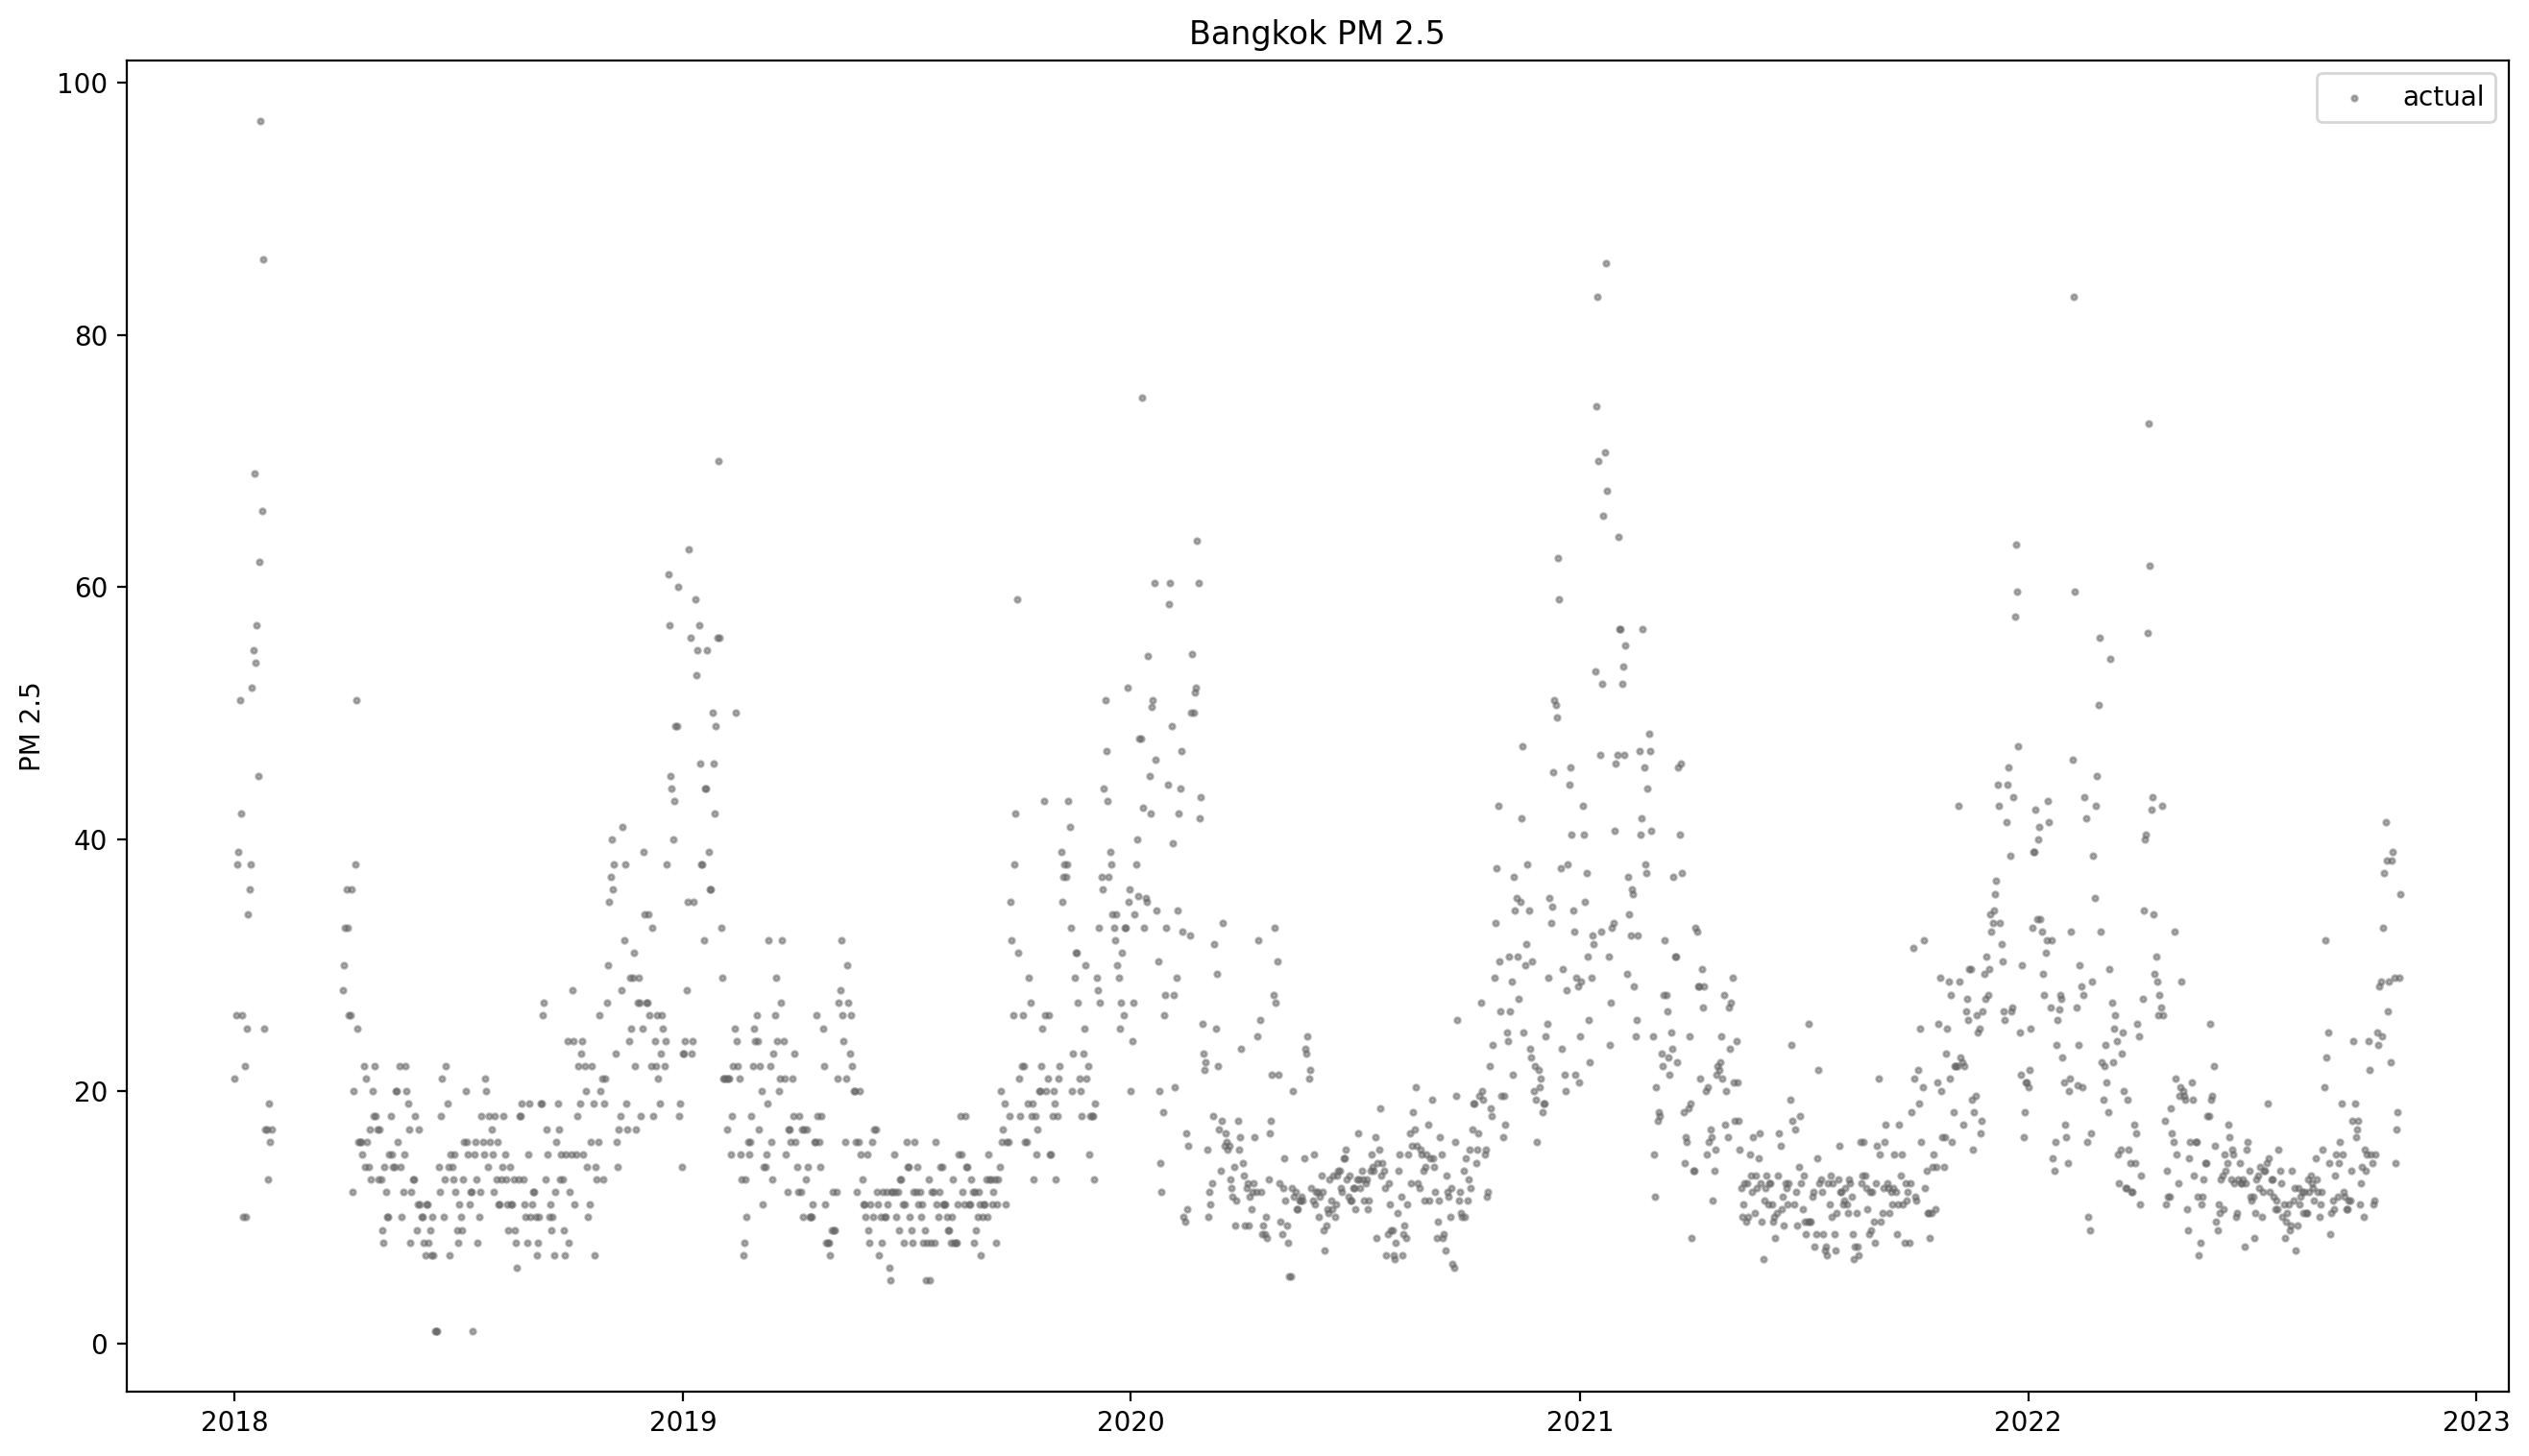

In [21]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [22]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df1[feature_cols]
y=df1[y_col]

In [23]:
split_at = 900
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [24]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [25]:
light_reg = lgb.LGBMRegressor()

In [26]:
light_reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [27]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [28]:
fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
light_reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 95.4423
[20]	valid_0's l2: 89.4716
[30]	valid_0's l2: 90.1854
[40]	valid_0's l2: 92.2531
[50]	valid_0's l2: 93.0397
[60]	valid_0's l2: 94.6175
[70]	valid_0's l2: 94.6607
[80]	valid_0's l2: 95.4986
[90]	valid_0's l2: 96.2442
[100]	valid_0's l2: 96.7161


LGBMRegressor()

In [29]:
light_reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7f77da24dee0>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [147.16461086130911,
                 134.6871671803045,
                 124.78700223893586,
                 116.98682226386659,
                 110.9133407556149,
                 106.75855947679183,
                 102.8989004401373,
                 100.08323395964075,
                 97.38344680659087,
                 95.44227474309469,
                 93.9607522960952,
                 92.55761443031959,
                 91.906741223

In [30]:
light_pred = light_reg.predict(X_test)

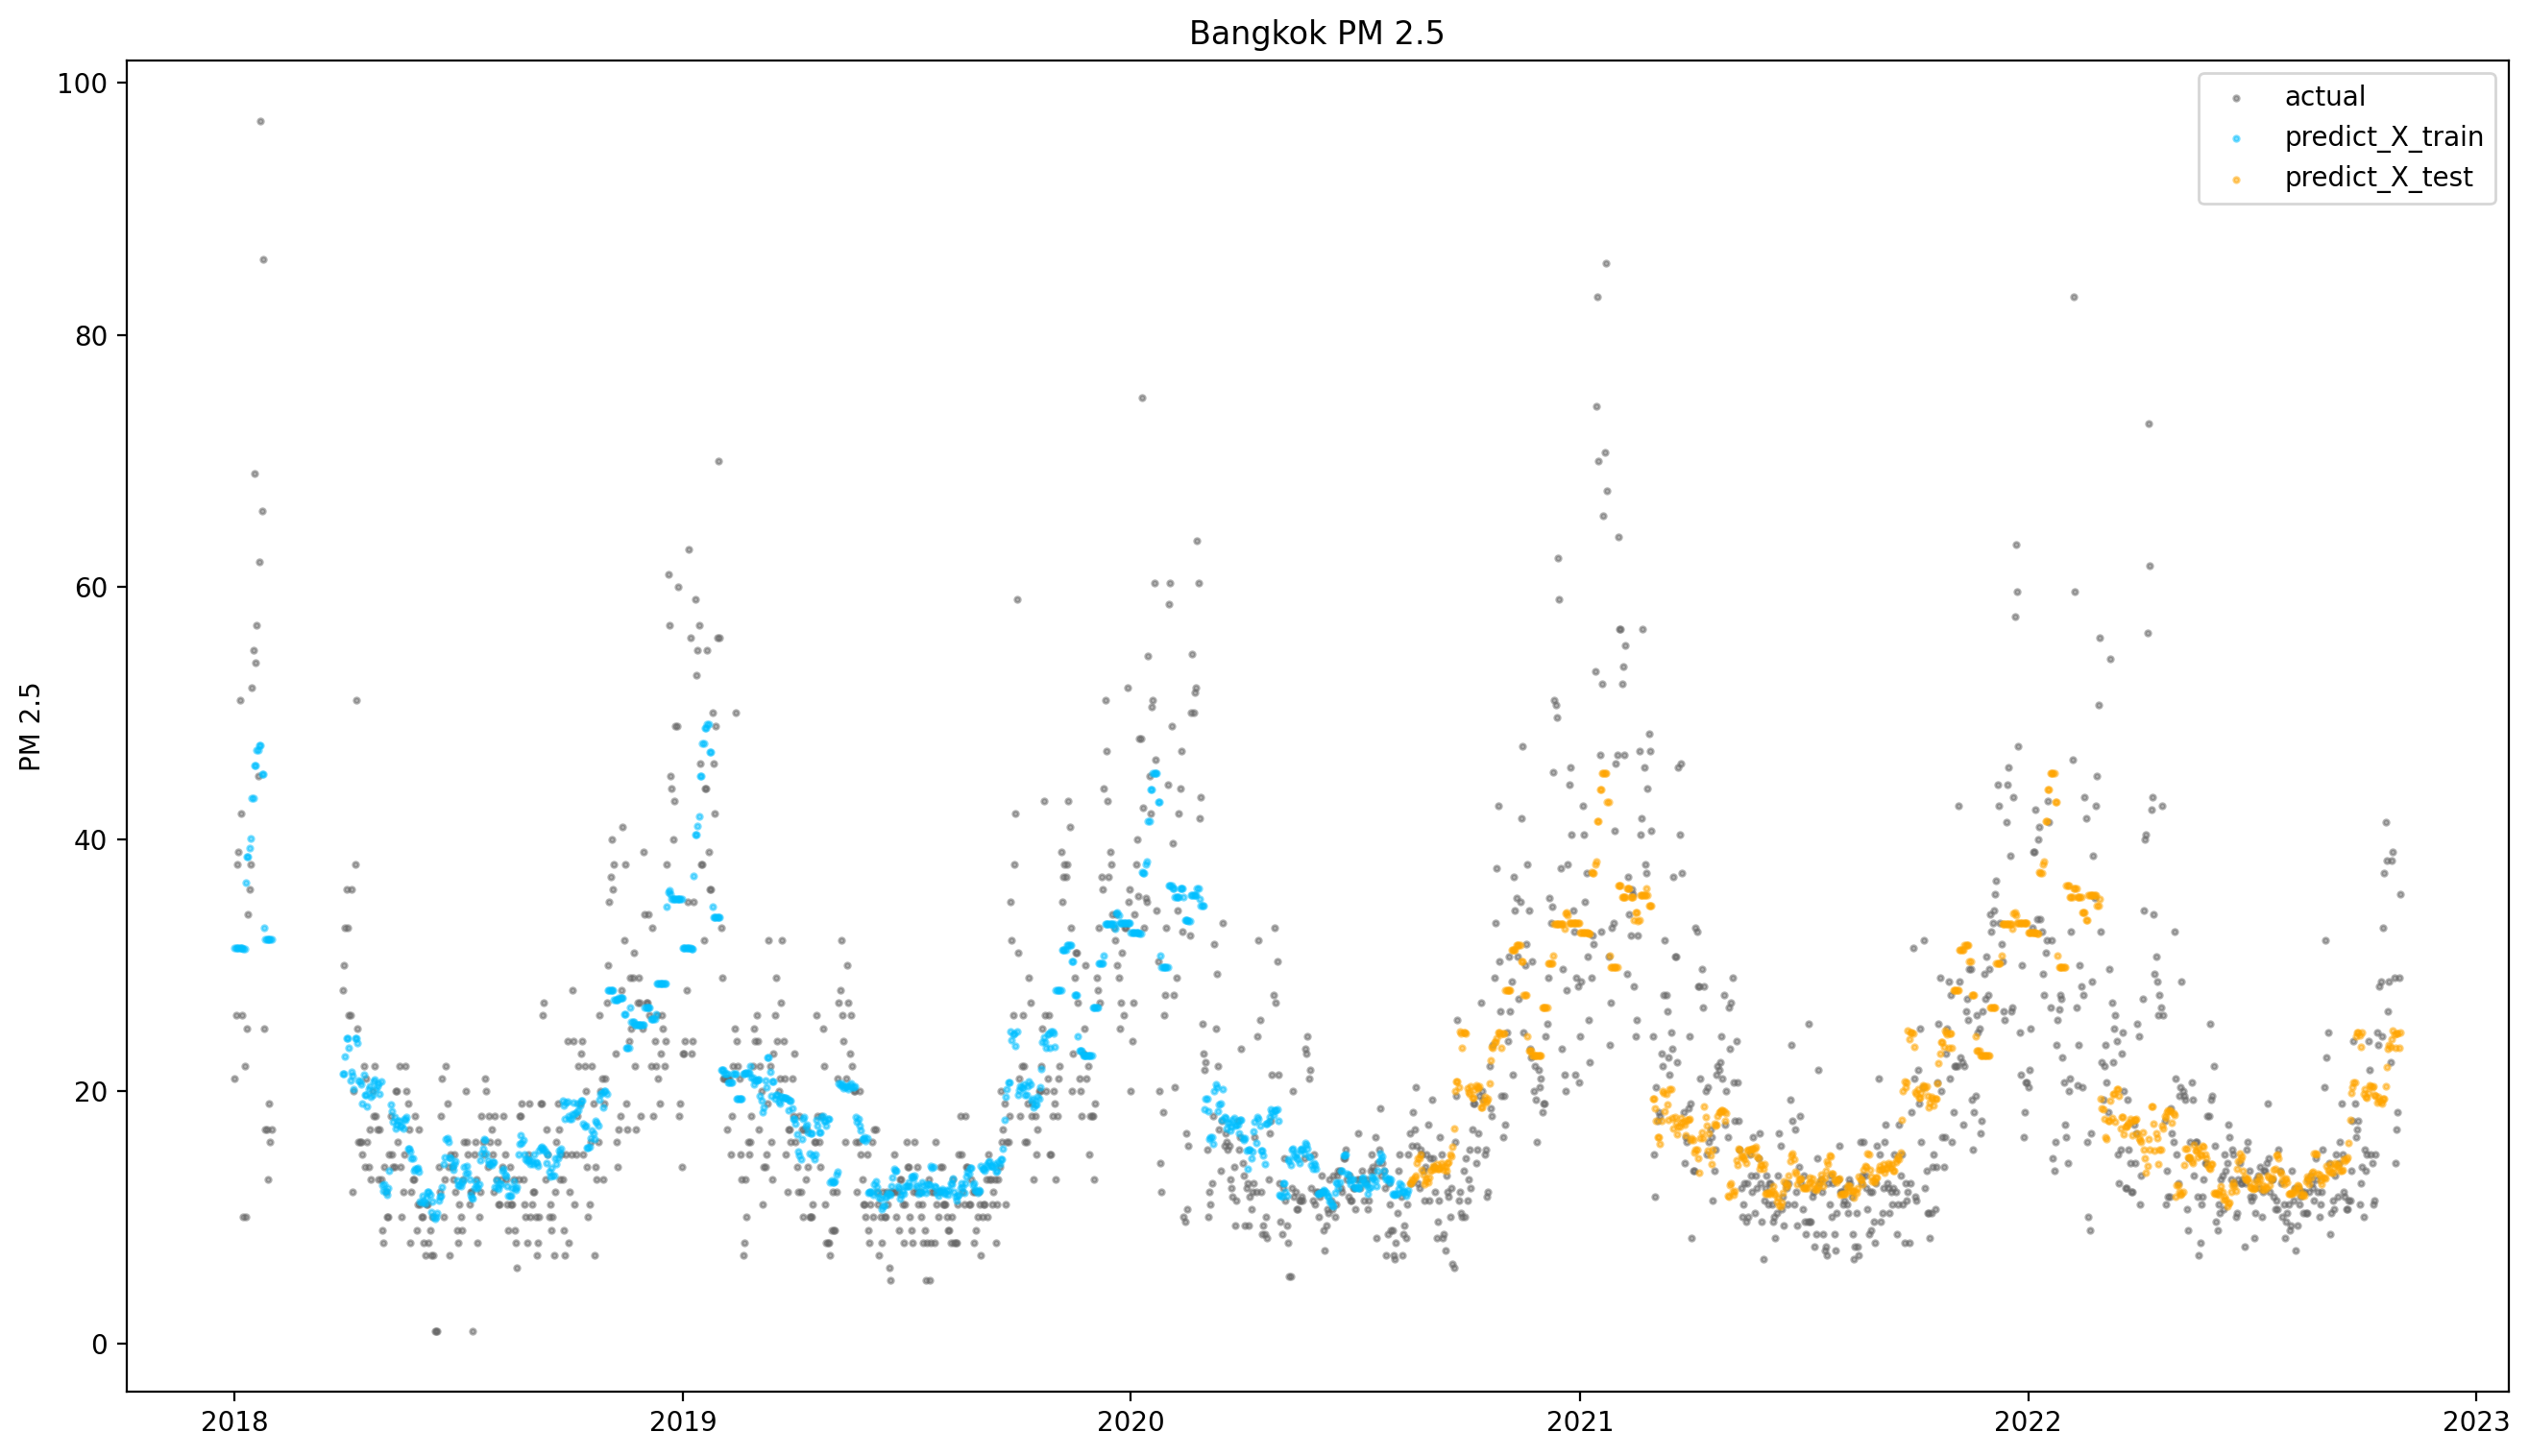

In [31]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [32]:
df1.head(3000)

year  month  day   day_name       pm25
date                                              
2018-01-01  2018      1    1     Monday  21.000000
2018-01-02  2018      1    2    Tuesday  26.000000
2018-01-03  2018      1    3  Wednesday  38.000000
2018-01-04  2018      1    4   Thursday  39.000000
2018-01-05  2018      1    5     Friday  51.000000
...          ...    ...  ...        ...        ...
2022-10-27  2022     10   27   Thursday  14.333333
2022-10-28  2022     10   28     Friday  17.000000
2022-10-29  2022     10   29   Saturday  18.333333
2022-10-30  2022     10   30     Sunday  29.000000
2022-10-31  2022     10   31     Monday  35.666667

[1708 rows x 5 columns]

In [33]:
yhat1=[]

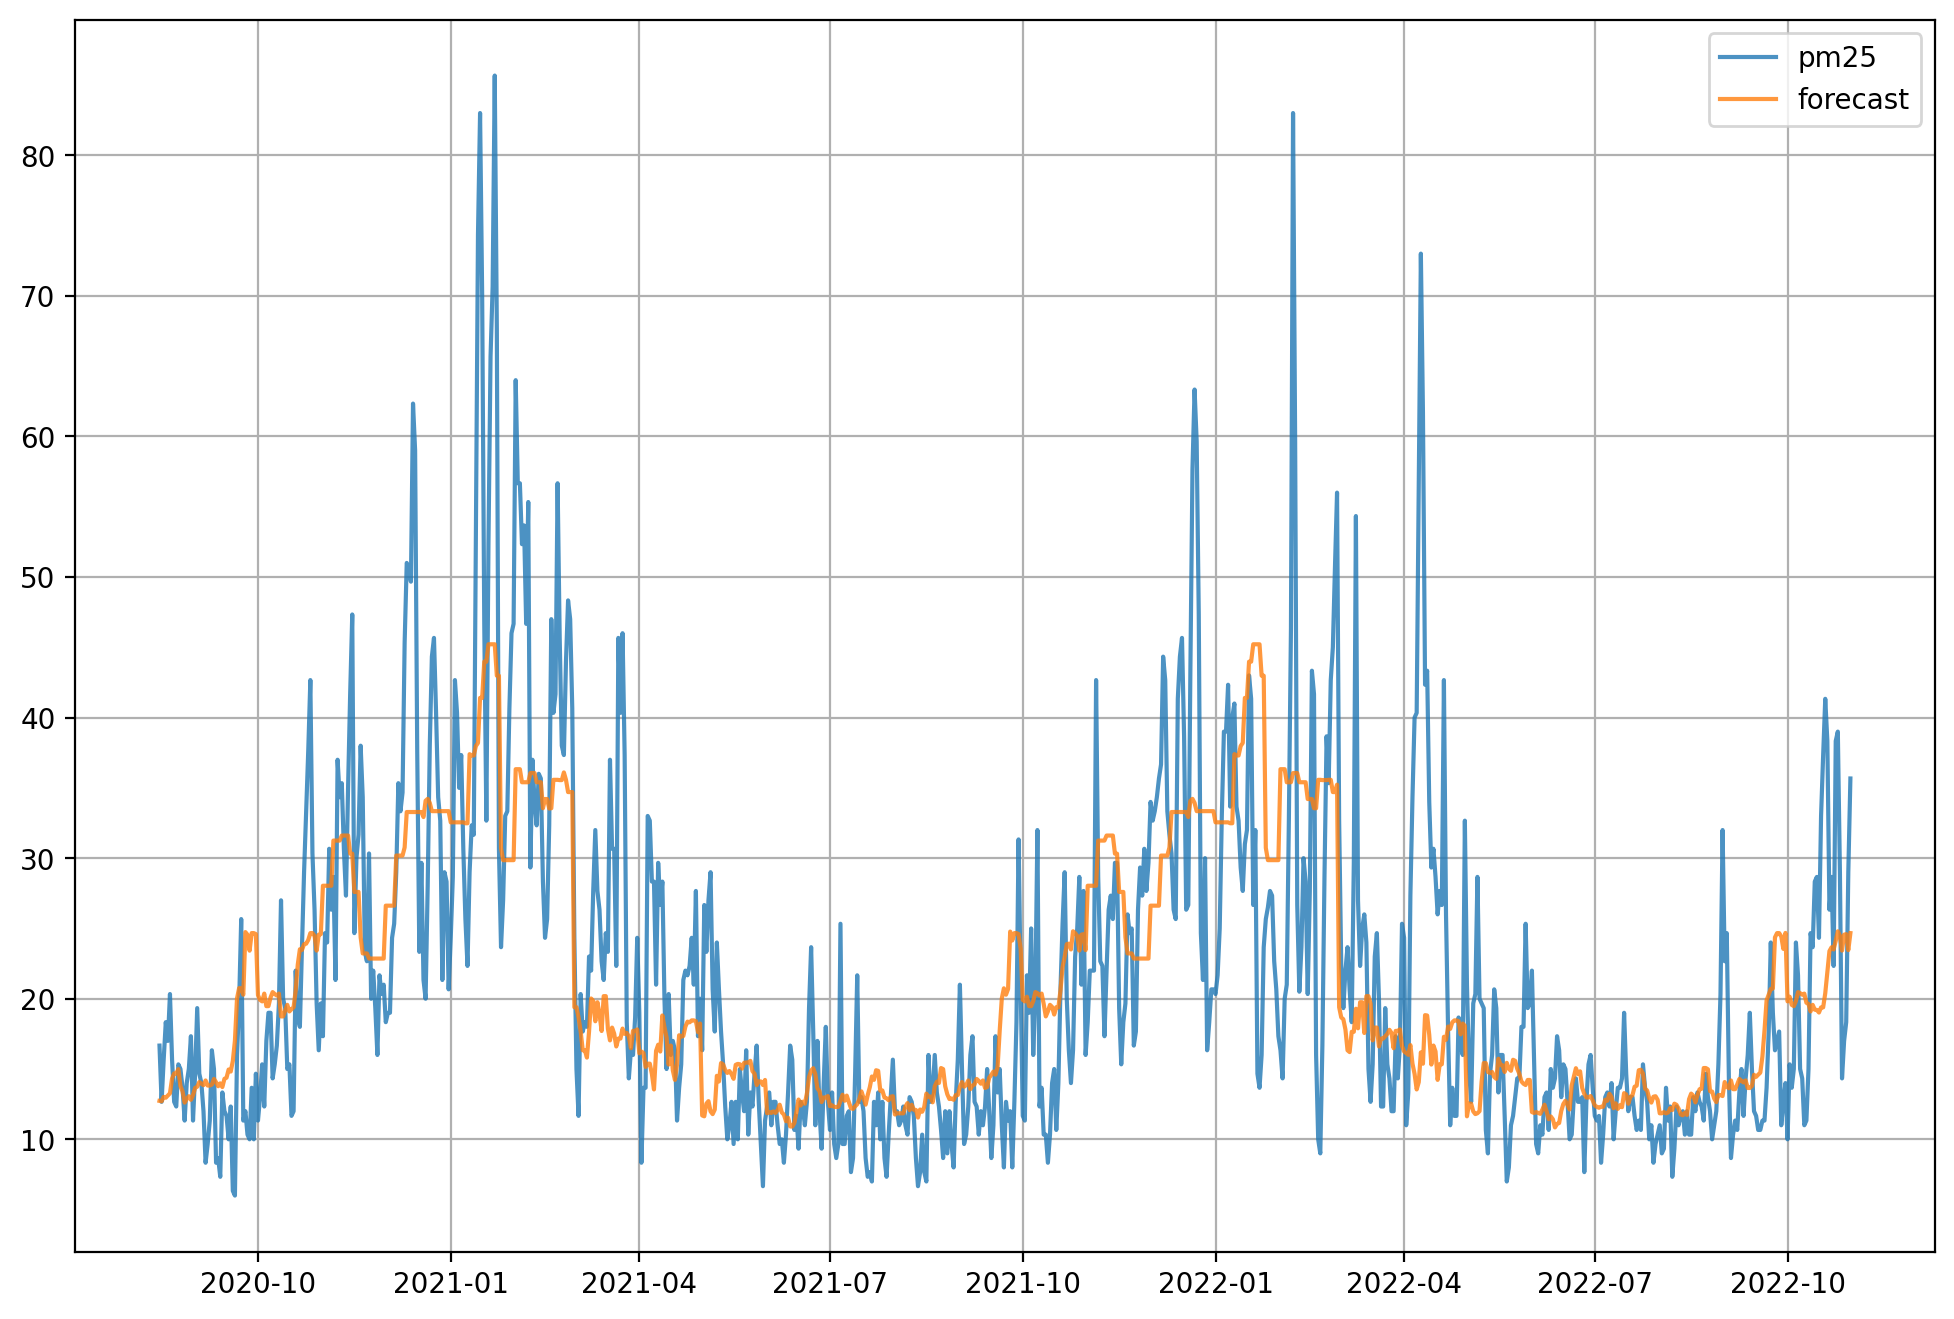

In [34]:
# test พยากรณ์กราฟ
yhat1 = light_reg.predict(X_test)

# Constructing the forecast dataframe
fc = df1.tail(len(yhat1)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat1
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [35]:
predict = pd.DataFrame(yhat1)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(7)
ypred


พยากรณ์ PM2.5
0      12.734058
1      12.702944
2      13.020285
3      12.958034
4      13.119350
5      13.275580
6      14.321408

In [36]:
Y_pred=light_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(Y_pred,y_test)
print('MSE',mse1)
rmse = np.sqrt(mse1)
print('RMSE',rmse)

 
test=X_test.copy()
test['light_pred'] = light_pred
test

MSE 89.43730104015366
RMSE 9.457129640654909


year  month  day   day_name  light_pred
date                                               
2020-08-15  2020      8   15   Saturday   12.734058
2020-08-16  2020      8   16     Sunday   12.702944
2020-08-17  2020      8   17     Monday   13.020285
2020-08-18  2020      8   18    Tuesday   12.958034
2020-08-19  2020      8   19  Wednesday   13.119350
...          ...    ...  ...        ...         ...
2022-10-27  2022     10   27   Thursday   23.424412
2022-10-28  2022     10   28     Friday   24.557801
2022-10-29  2022     10   29   Saturday   24.592788
2022-10-30  2022     10   30     Sunday   23.459398
2022-10-31  2022     10   31     Monday   24.668824

[808 rows x 5 columns]

In [37]:
#LSTM

In [38]:
from pandas import read_csv
from datetime import datetime
	
df2 = pd.read_csv('/content/drive/MyDrive/code/code/dataAir_mixavg.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)


In [39]:
df2.describe().round(2).T

count     mean    std      min      25%      50%      75%  \
pm10              1765.0    52.52  21.75    18.33    35.67    47.67    64.08   
co                1765.0     1.24  10.12     0.16     0.58     0.82     1.11   
no                1765.0    41.60  24.94     1.83    21.35    37.49    57.57   
no2               1765.0    22.71  11.96     3.91    13.65    19.68    29.50   
nox               1765.0    64.38  35.51     5.88    36.36    57.02    87.80   
pm25              1708.0    21.14  12.76     1.00    12.00    17.00    26.33   
avgT              1695.0    30.24   1.76    16.60    29.30    30.30    31.30   
humid             1765.0    73.93   8.26    32.00    69.00    74.00    79.00   
pressure-monthly  1765.0  1008.48   2.13  1004.94  1006.53  1008.20  1010.15   
windDir           1735.0   188.91  85.55     0.00   120.00   190.00   250.00   
windSpd           1737.0     8.07   2.61     1.00     6.00     8.00     9.00   

                      max  
pm10               155.75  
co                 417.56  
no                 153.10  
no2                 82.32  
nox                230.70  
pm25                97.00  
avgT                35.10  
humid               97.00  
pressure-monthly  1012.61  
windDir            360.00  
windSpd             24.00

In [40]:
dd = df2.drop(['pm25', 'pm10','no2', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd'],axis = 1)
dd.head()

no    nox
date                   
2018-01-01  74.2  119.5
2018-01-02  73.0  124.2
2018-01-03  98.5  156.5
2018-01-04  92.4  155.2
2018-01-05  51.1  111.9

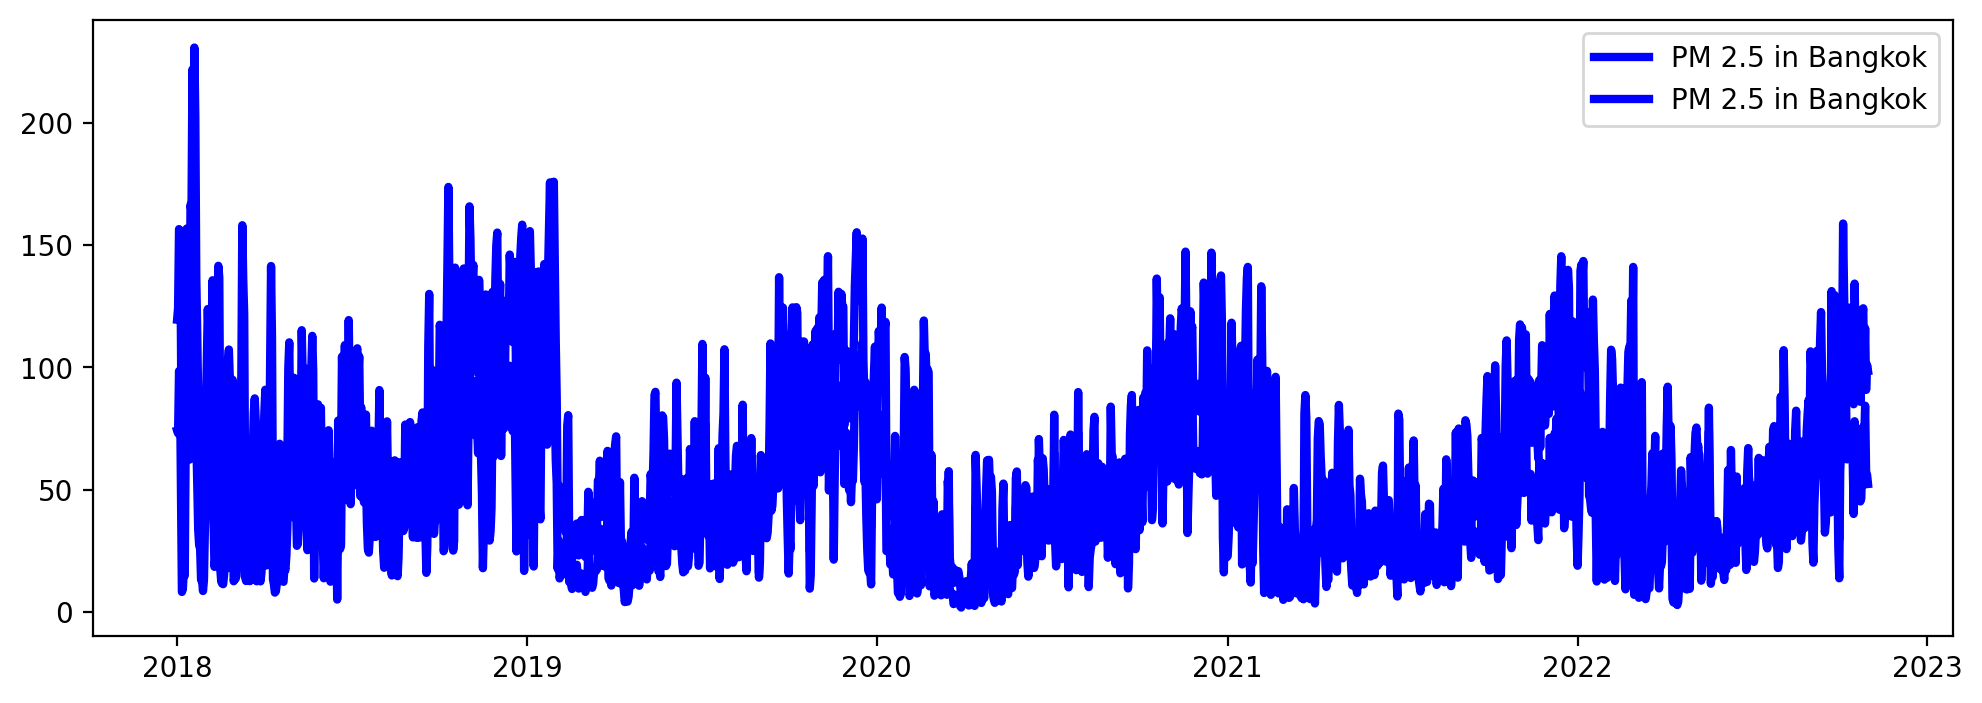

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 in Bangkok')
plt.legend()
plt.show()

In [43]:
y_col='pm25'

In [45]:
df2.dropna(subset=[y_col], inplace=True)
df = df2.reset_index(drop=True)
df

pm10     co      no    no2      nox       pm25  avgT  humid  \
0     48.645833  0.985  74.200  29.33  119.500  21.000000  27.1     70   
1     57.020833  1.015  73.000  35.13  124.200  26.000000  27.5     67   
2     73.854167  1.290  98.500  43.54  156.500  38.000000  28.2     66   
3     85.062500  1.310  92.400  42.46  155.200  39.000000  29.3     64   
4     91.812500  1.175  51.100  48.80  111.900  51.000000  30.4     63   
...         ...    ...     ...    ...      ...        ...   ...    ...   
1703  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5     79   
1704  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6     72   
1705  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5     62   
1706  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0     62   
1707  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1703           1009.24    120.0      9.0  
1704           1009.24    170.0      7.0  
1705           1009.24    120.0     13.0  
1706           1009.24    120.0     13.0  
1707           1009.24      NaN      NaN  

[1708 rows x 11 columns]

In [46]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1708 entries, 2018-01-01 to 2022-10-31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              1708 non-null   float64
 1   co                1708 non-null   float64
 2   no                1708 non-null   float64
 3   no2               1708 non-null   float64
 4   nox               1708 non-null   float64
 5   pm25              1708 non-null   float64
 6   avgT              1680 non-null   float64
 7   humid             1708 non-null   int64  
 8   pressure-monthly  1708 non-null   float64
 9   windDir           1678 non-null   float64
 10  windSpd           1680 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 160.1 KB


(1708, 11)

In [47]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[0.22058824, 0.00197652, 0.47841608, 0.32418529, 0.50539308,
        0.20833333, 0.56756757, 0.58461538, 0.58148631, 0.27777778,
        0.34782609],
       [0.28153426, 0.00204839, 0.47048324, 0.3981633 , 0.52629823,
        0.26041667, 0.58918919, 0.53846154, 0.58148631, 0.33333333,
        0.13043478],
       [0.40403275, 0.00270724, 0.63905599, 0.50543143, 0.66996553,
        0.38541667, 0.62702703, 0.52307692, 0.58148631, 0.16666667,
        0.13043478],
       [0.48559733, 0.00275515, 0.59873075, 0.49165621, 0.66418325,
        0.39583333, 0.68648649, 0.49230769, 0.58148631, 0.91666667,
        0.2173913 ],
       [0.53471801, 0.00243172, 0.325709  , 0.57252184, 0.47158901,
        0.52083333, 0.74594595, 0.47692308, 0.58148631,        nan,
               nan],
       [0.49590661, 0.0018208 , 0.04211013, 0.42871112, 0.19137107,
        0.42708333, 0.71351351, 0.58461538, 0.58148631, 0.33333333,
        0.04347826],
       [0.16206792, 0.00095831, 0.05004297, 0.15020939, 0.

In [48]:
n_train = int(df.shape[0] * 0.80)
n_train

1366

In [49]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [50]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((1366, 11), (342, 11))

In [51]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [52]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [53]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [54]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df2,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [55]:
model = deep_learner.LSTModel() 

Epoch 1/60
6/6 [==============================] - 3s 72ms/step - loss: 401.8441 - val_loss: 257.7808
Epoch 2/60
6/6 [==============================] - 0s 15ms/step - loss: 275.2616 - val_loss: 169.9739
Epoch 3/60
6/6 [==============================] - 0s 20ms/step - loss: 168.8132 - val_loss: 124.4597
Epoch 4/60
6/6 [==============================] - 0s 15ms/step - loss: 136.9995 - val_loss: 94.1410
Epoch 5/60
6/6 [==============================] - 0s 15ms/step - loss: 92.5880 - val_loss: 65.2715
Epoch 6/60
6/6 [==============================] - 0s 17ms/step - loss: 71.4307 - val_loss: 48.4237
Epoch 7/60
6/6 [==============================] - 0s 15ms/step - loss: 59.6437 - val_loss: 46.0726
Epoch 8/60
6/6 [==============================] - 0s 18ms/step - loss: 56.5509 - val_loss: 37.2945
Epoch 9/60
6/6 [==============================] - 0s 17ms/step - loss: 52.2824 - val_loss: 37.4312
Epoch 10/60
6/6 [==============================] - 0s 18ms/step - loss: 50.2043 - val_loss: 33.8984
Ep

In [56]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df2.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

8/8 [==============================] - 0s 2ms/step


In [57]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
7/7 [==============================] - 2s 77ms/step - loss: 662.4250
Epoch 2/10
7/7 [==============================] - 1s 76ms/step - loss: 577.4047
Epoch 3/10
7/7 [==============================] - 1s 75ms/step - loss: 4014.4629
Epoch 4/10
7/7 [==============================] - 1s 75ms/step - loss: 6397.1641
Epoch 5/10
7/7 [==============================] - 1s 77ms/step - loss: 698.4601
Epoch 6/10
7/7 [==============================] - 1s 79ms/step - loss: 464.3299
Epoch 7/10
7/7 [==============================] - 1s 75ms/step - loss: 478.8994
Epoch 8/10
7/7 [==============================] - 1s 75ms/step - loss: 401.6080
Epoch 9/10
7/7 [==============================] - 1s 79ms/step - loss: 338.6030
Epoch 10/10
1/1 [==============================] - 0s 23ms/step


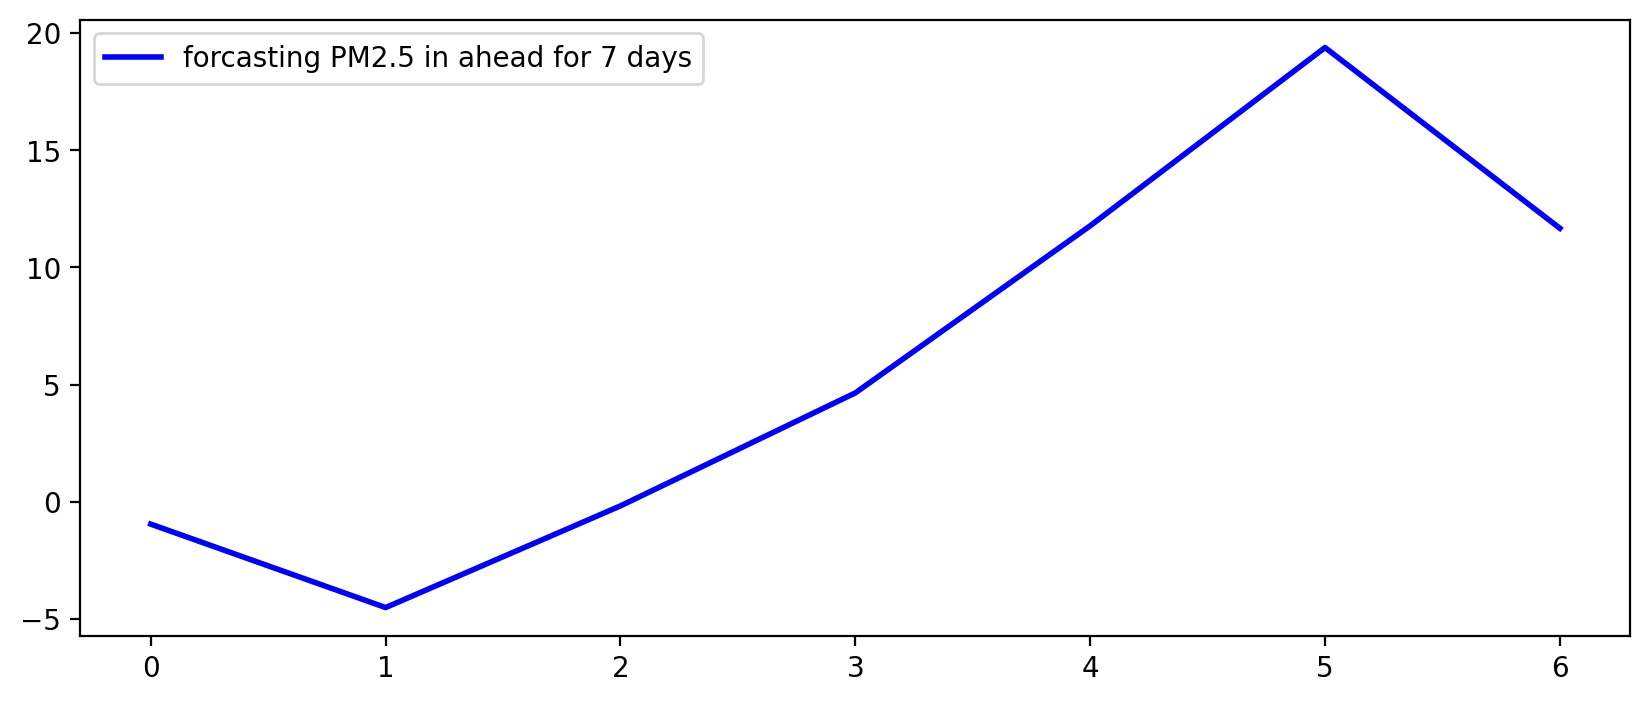

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [59]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

พยากรณ์ PM2.5
0      -0.958127
1      -4.517904
2      -0.179251
3       4.641824
4      11.773009
5      19.379553
6      11.667508

In [60]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

พยากรณ์ PM2.5
0           -1.0
1           -5.0
2           -0.0
3            5.0
4           12.0
5           19.0
6           12.0

In [61]:
ypred.mean().round(0)

พยากรณ์ PM2.5    6.0
dtype: float32

In [62]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(ypred,yhat)
p_mse = mse2*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 10.010386258363724
RMSE 3.163919445618634


In [63]:
#prophet

In [64]:
#import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
from pandas import read_csv
from datetime import datetime
	
df3 = pd.read_csv('/content/drive/MyDrive/code/code/dataAir_mixavg.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
df3 

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1760 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1761 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1762 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1763 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1764 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1760     79           1009.24    120.0      9.0  
1761     72           1009.24    170.0      7.0  
1762     62           1009.24    120.0     13.0  
1763     62           1009.24    120.0     13.0  
1764     59           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1765 non-null   float64       
 2   co                1765 non-null   float64       
 3   no                1765 non-null   float64       
 4   no2               1765 non-null   float64       
 5   nox               1765 non-null   float64       
 6   pm25              1708 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


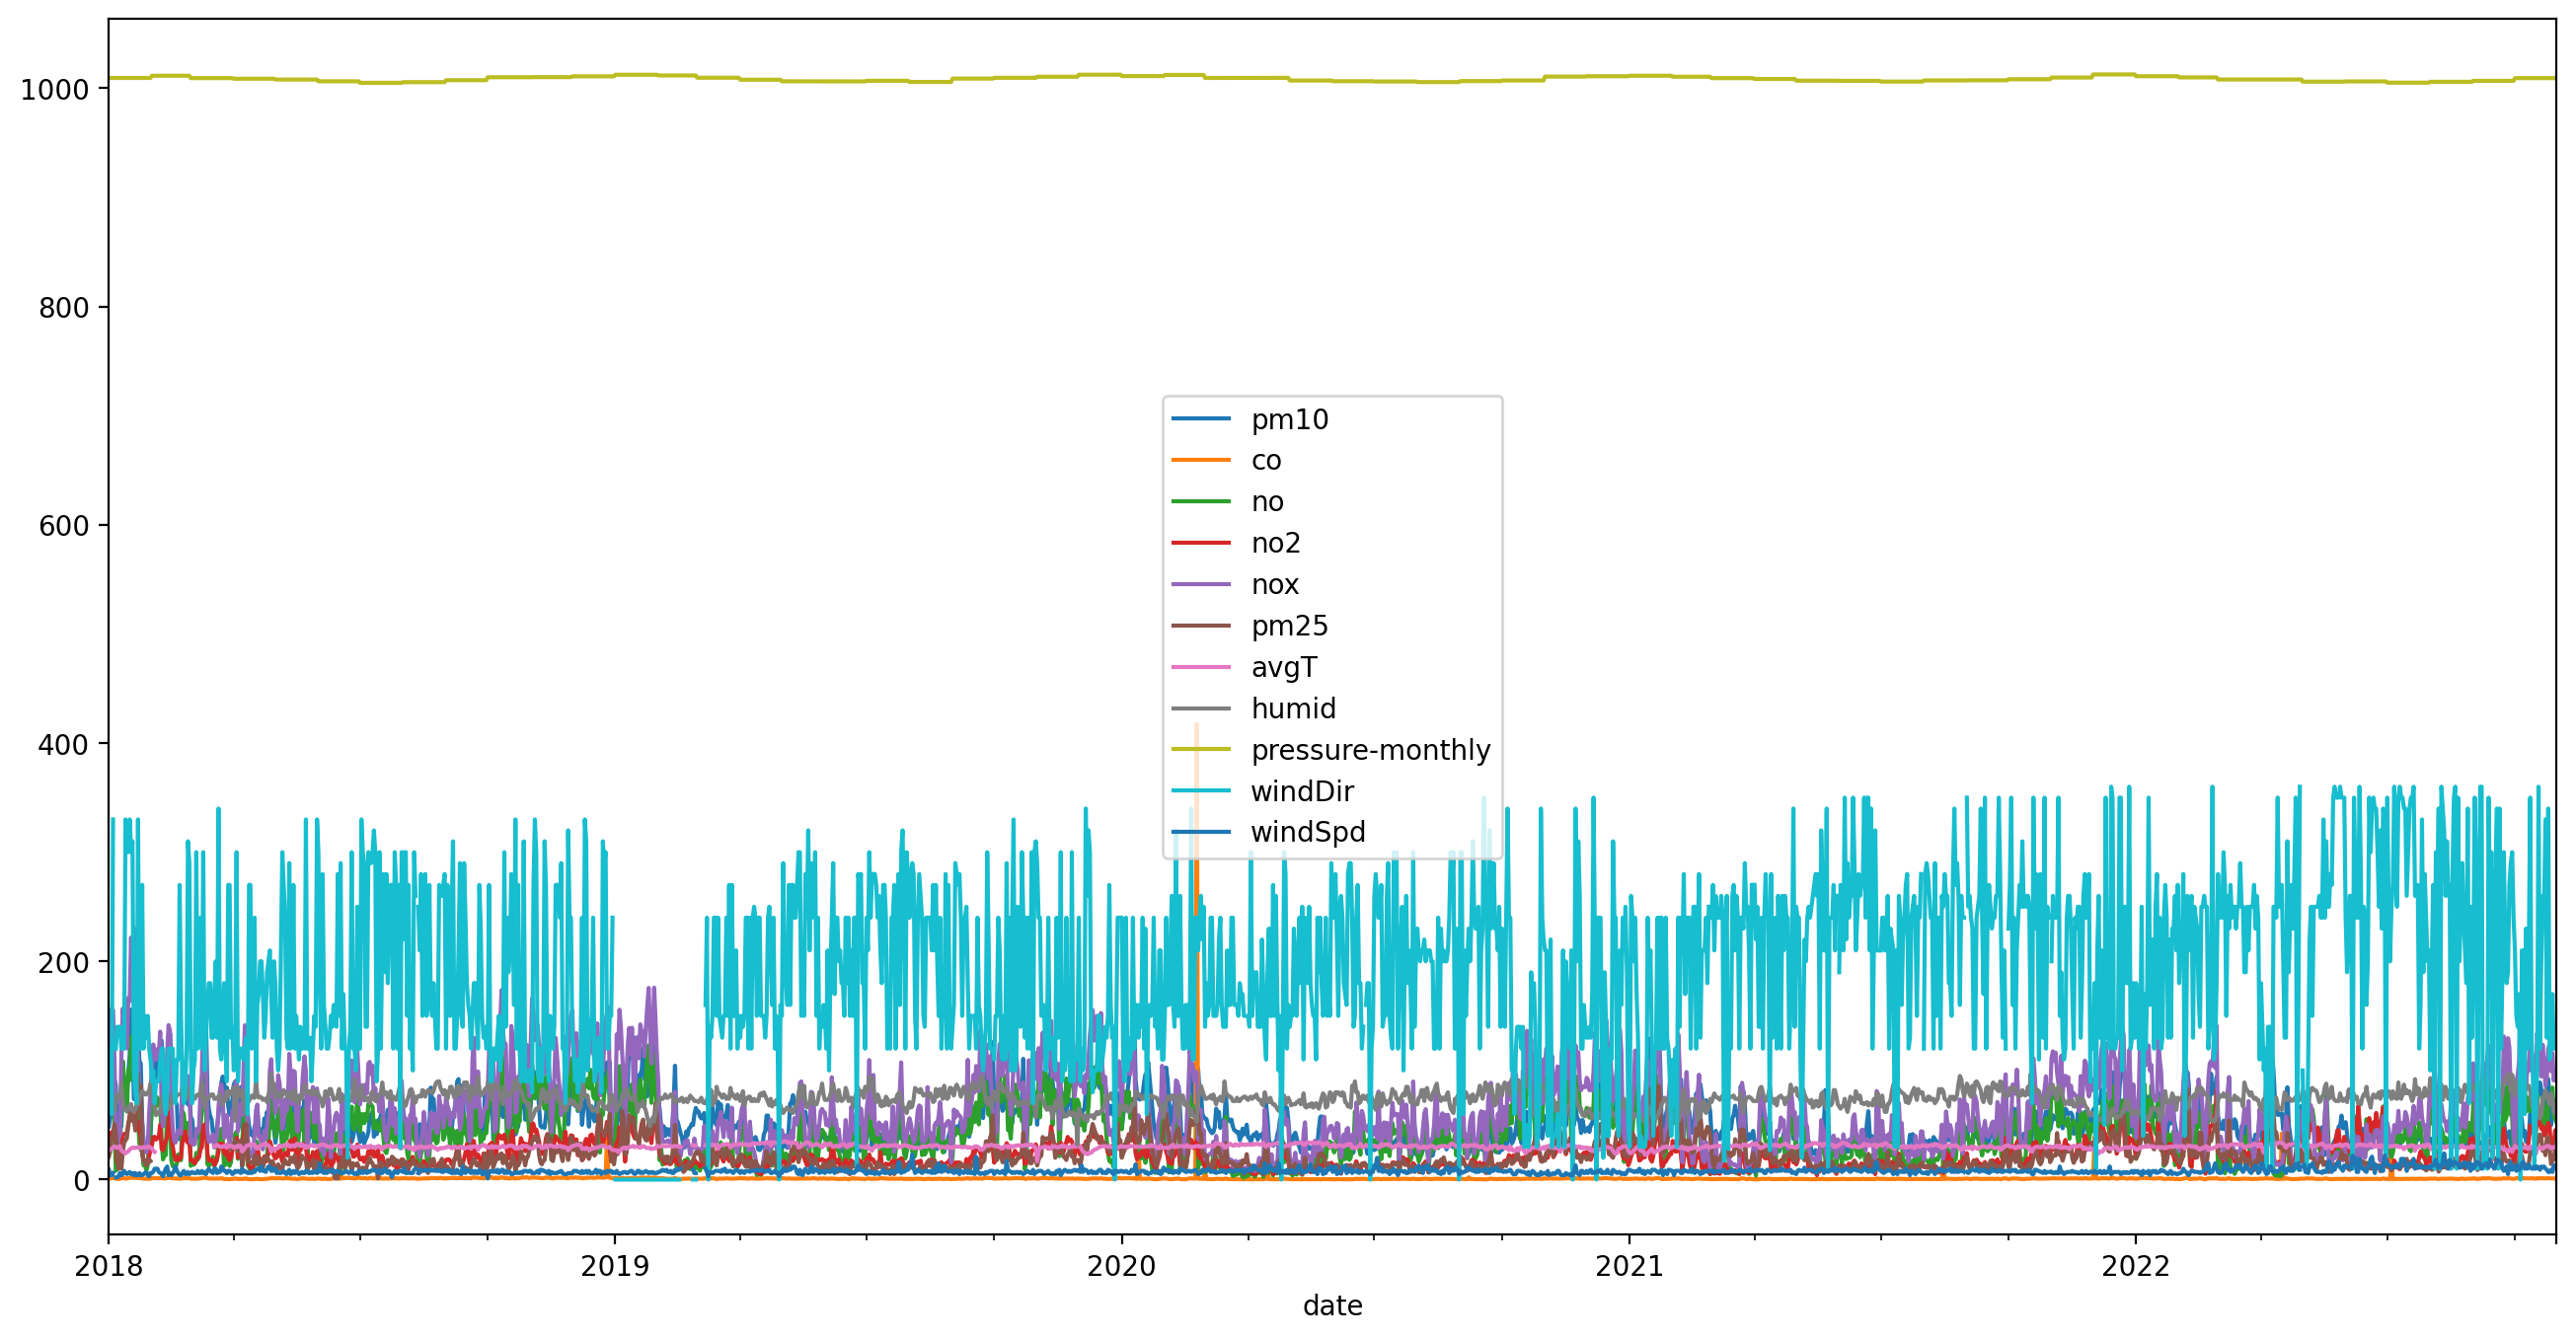

In [69]:
df3.set_index('date').plot(figsize=(16, 8));

In [70]:
data3 = df3.sort_values('date').reset_index(drop=True).copy()
data3

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1760 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1761 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1762 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1763 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1764 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1760     79           1009.24    120.0      9.0  
1761     72           1009.24    170.0      7.0  
1762     62           1009.24    120.0     13.0  
1763     62           1009.24    120.0     13.0  
1764     59           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [71]:
y_col = 'pm25'

In [72]:
data3.dropna(subset=[y_col], inplace=True)
data3

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1760 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1761 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1762 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1763 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1764 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1760     79           1009.24    120.0      9.0  
1761     72           1009.24    170.0      7.0  
1762     62           1009.24    120.0     13.0  
1763     62           1009.24    120.0     13.0  
1764     59           1009.24      NaN      NaN  

[1708 rows x 12 columns]

In [73]:
df3 = data3[['date', y_col]]
df3.columns=['ds', 'y']
df3

ds          y
0    2018-01-01  21.000000
1    2018-01-02  26.000000
2    2018-01-03  38.000000
3    2018-01-04  39.000000
4    2018-01-05  51.000000
...         ...        ...
1760 2022-10-27  14.333333
1761 2022-10-28  17.000000
1762 2022-10-29  18.333333
1763 2022-10-30  29.000000
1764 2022-10-31  35.666667

[1708 rows x 2 columns]

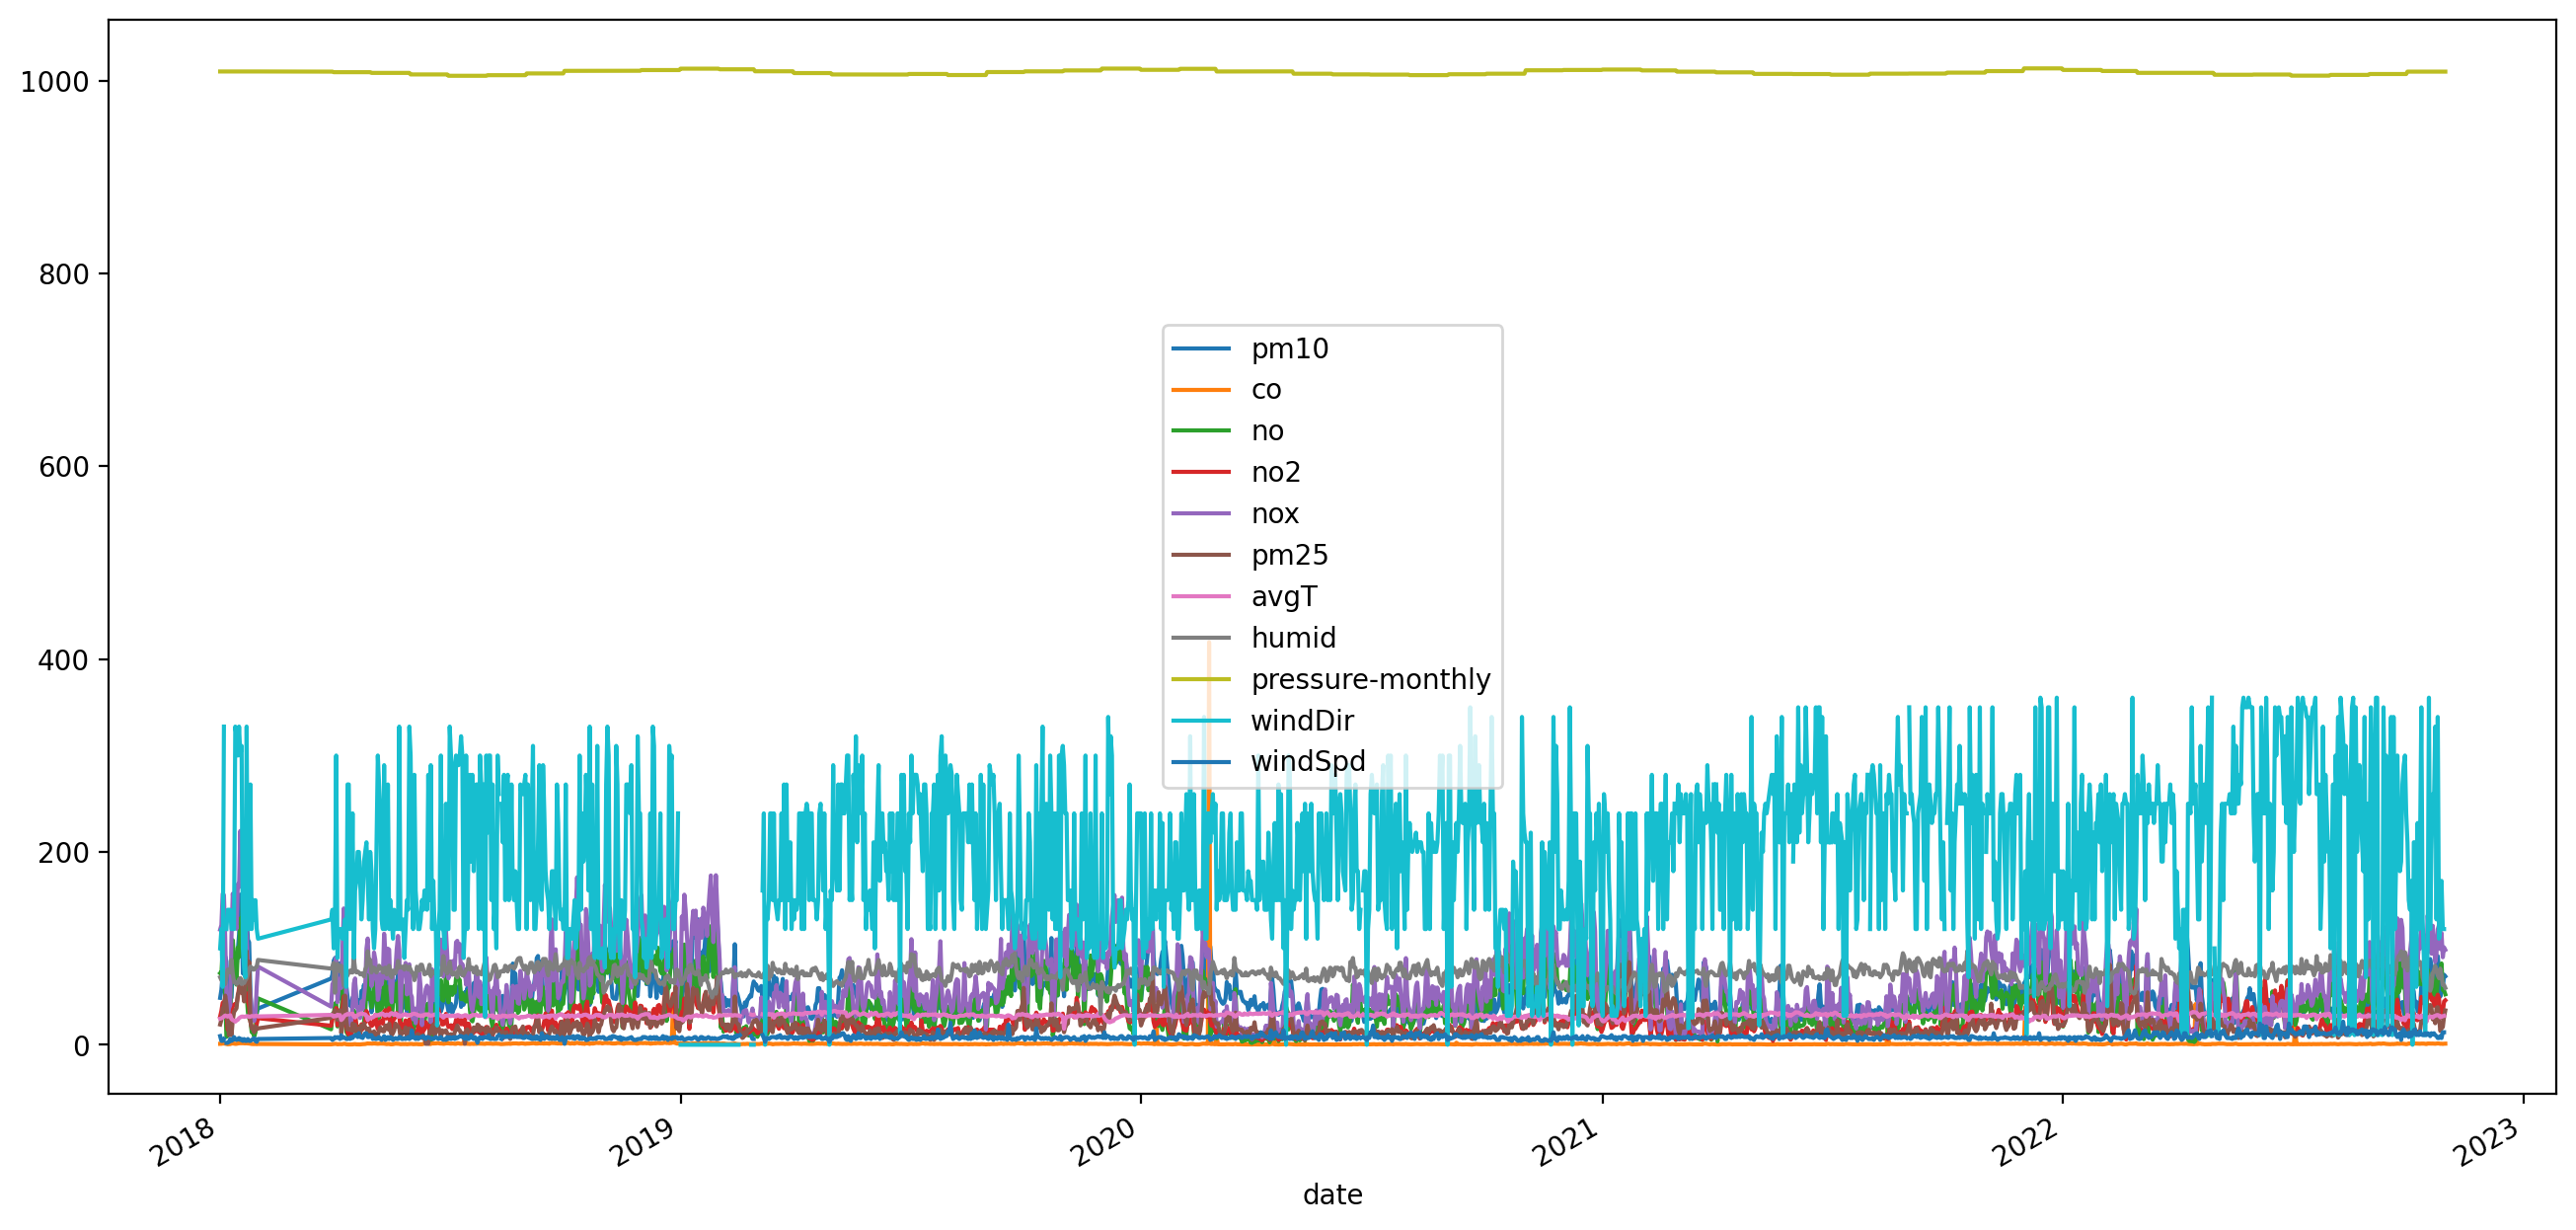

In [74]:
data3.set_index('date').plot(figsize=(16, 8));

In [75]:
model=Prophet()

In [76]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7f77744dcd60>}

In [77]:
model.fit(df3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7wo868f/2m_n7hta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7wo868f/667dnxoa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47176', 'data', 'file=/tmp/tmpe7wo868f/2m_n7hta.json', 'init=/tmp/tmpe7wo868f/667dnxoa.json', 'output', 'file=/tmp/tmpe7wo868f/prophet_modelzhs9ueku/prophet_model-20230402100003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:00:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [78]:
df3.tail()

ds          y
1760 2022-10-27  14.333333
1761 2022-10-28  17.000000
1762 2022-10-29  18.333333
1763 2022-10-30  29.000000
1764 2022-10-31  35.666667

In [79]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

ds
1883 2023-04-25
1884 2023-04-26
1885 2023-04-27
1886 2023-04-28
1887 2023-04-29

In [80]:
future.head()

ds
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05

In [81]:
ypred.mean().round(0)

พยากรณ์ PM2.5    6.0
dtype: float32

In [82]:
forecast = model.predict(future)

In [83]:
df3

ds          y
0    2018-01-01  21.000000
1    2018-01-02  26.000000
2    2018-01-03  38.000000
3    2018-01-04  39.000000
4    2018-01-05  51.000000
...         ...        ...
1760 2022-10-27  14.333333
1761 2022-10-28  17.000000
1762 2022-10-29  18.333333
1763 2022-10-30  29.000000
1764 2022-10-31  35.666667

[1708 rows x 2 columns]

In [84]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

ds       yhat  yhat_lower  yhat_upper
0    2018-01-01  32.646222   21.357108   43.797171
1    2018-01-02  33.088358   22.045697   45.164461
2    2018-01-03  33.707023   22.584203   45.562344
3    2018-01-04  33.209081   21.707815   44.380016
4    2018-01-05  33.972151   21.879006   45.980822
...         ...        ...         ...         ...
1883 2023-04-25  18.301291    6.870070   28.839676
1884 2023-04-26  18.337785    6.757438   30.076882
1885 2023-04-27  17.228398    5.620205   28.699955
1886 2023-04-28  17.356215    5.070118   28.495096
1887 2023-04-29  16.531681    5.406880   27.713210

[1888 rows x 4 columns]

In [85]:
dt=pd.merge(df3, dfcst, left_on='ds', right_on='ds')
dt

ds          y       yhat  yhat_lower  yhat_upper
0    2018-01-01  21.000000  32.646222   21.357108   43.797171
1    2018-01-02  26.000000  33.088358   22.045697   45.164461
2    2018-01-03  38.000000  33.707023   22.584203   45.562344
3    2018-01-04  39.000000  33.209081   21.707815   44.380016
4    2018-01-05  51.000000  33.972151   21.879006   45.980822
...         ...        ...        ...         ...         ...
1703 2022-10-27  14.333333  24.929453   13.009518   36.425427
1704 2022-10-28  17.000000  25.849167   13.415794   36.995971
1705 2022-10-29  18.333333  25.738818   14.409846   37.307272
1706 2022-10-30  29.000000  25.894919   14.712390   37.187789
1707 2022-10-31  35.666667  27.853511   16.819150   39.194699

[1708 rows x 5 columns]

In [86]:
dt.shape

(1708, 5)

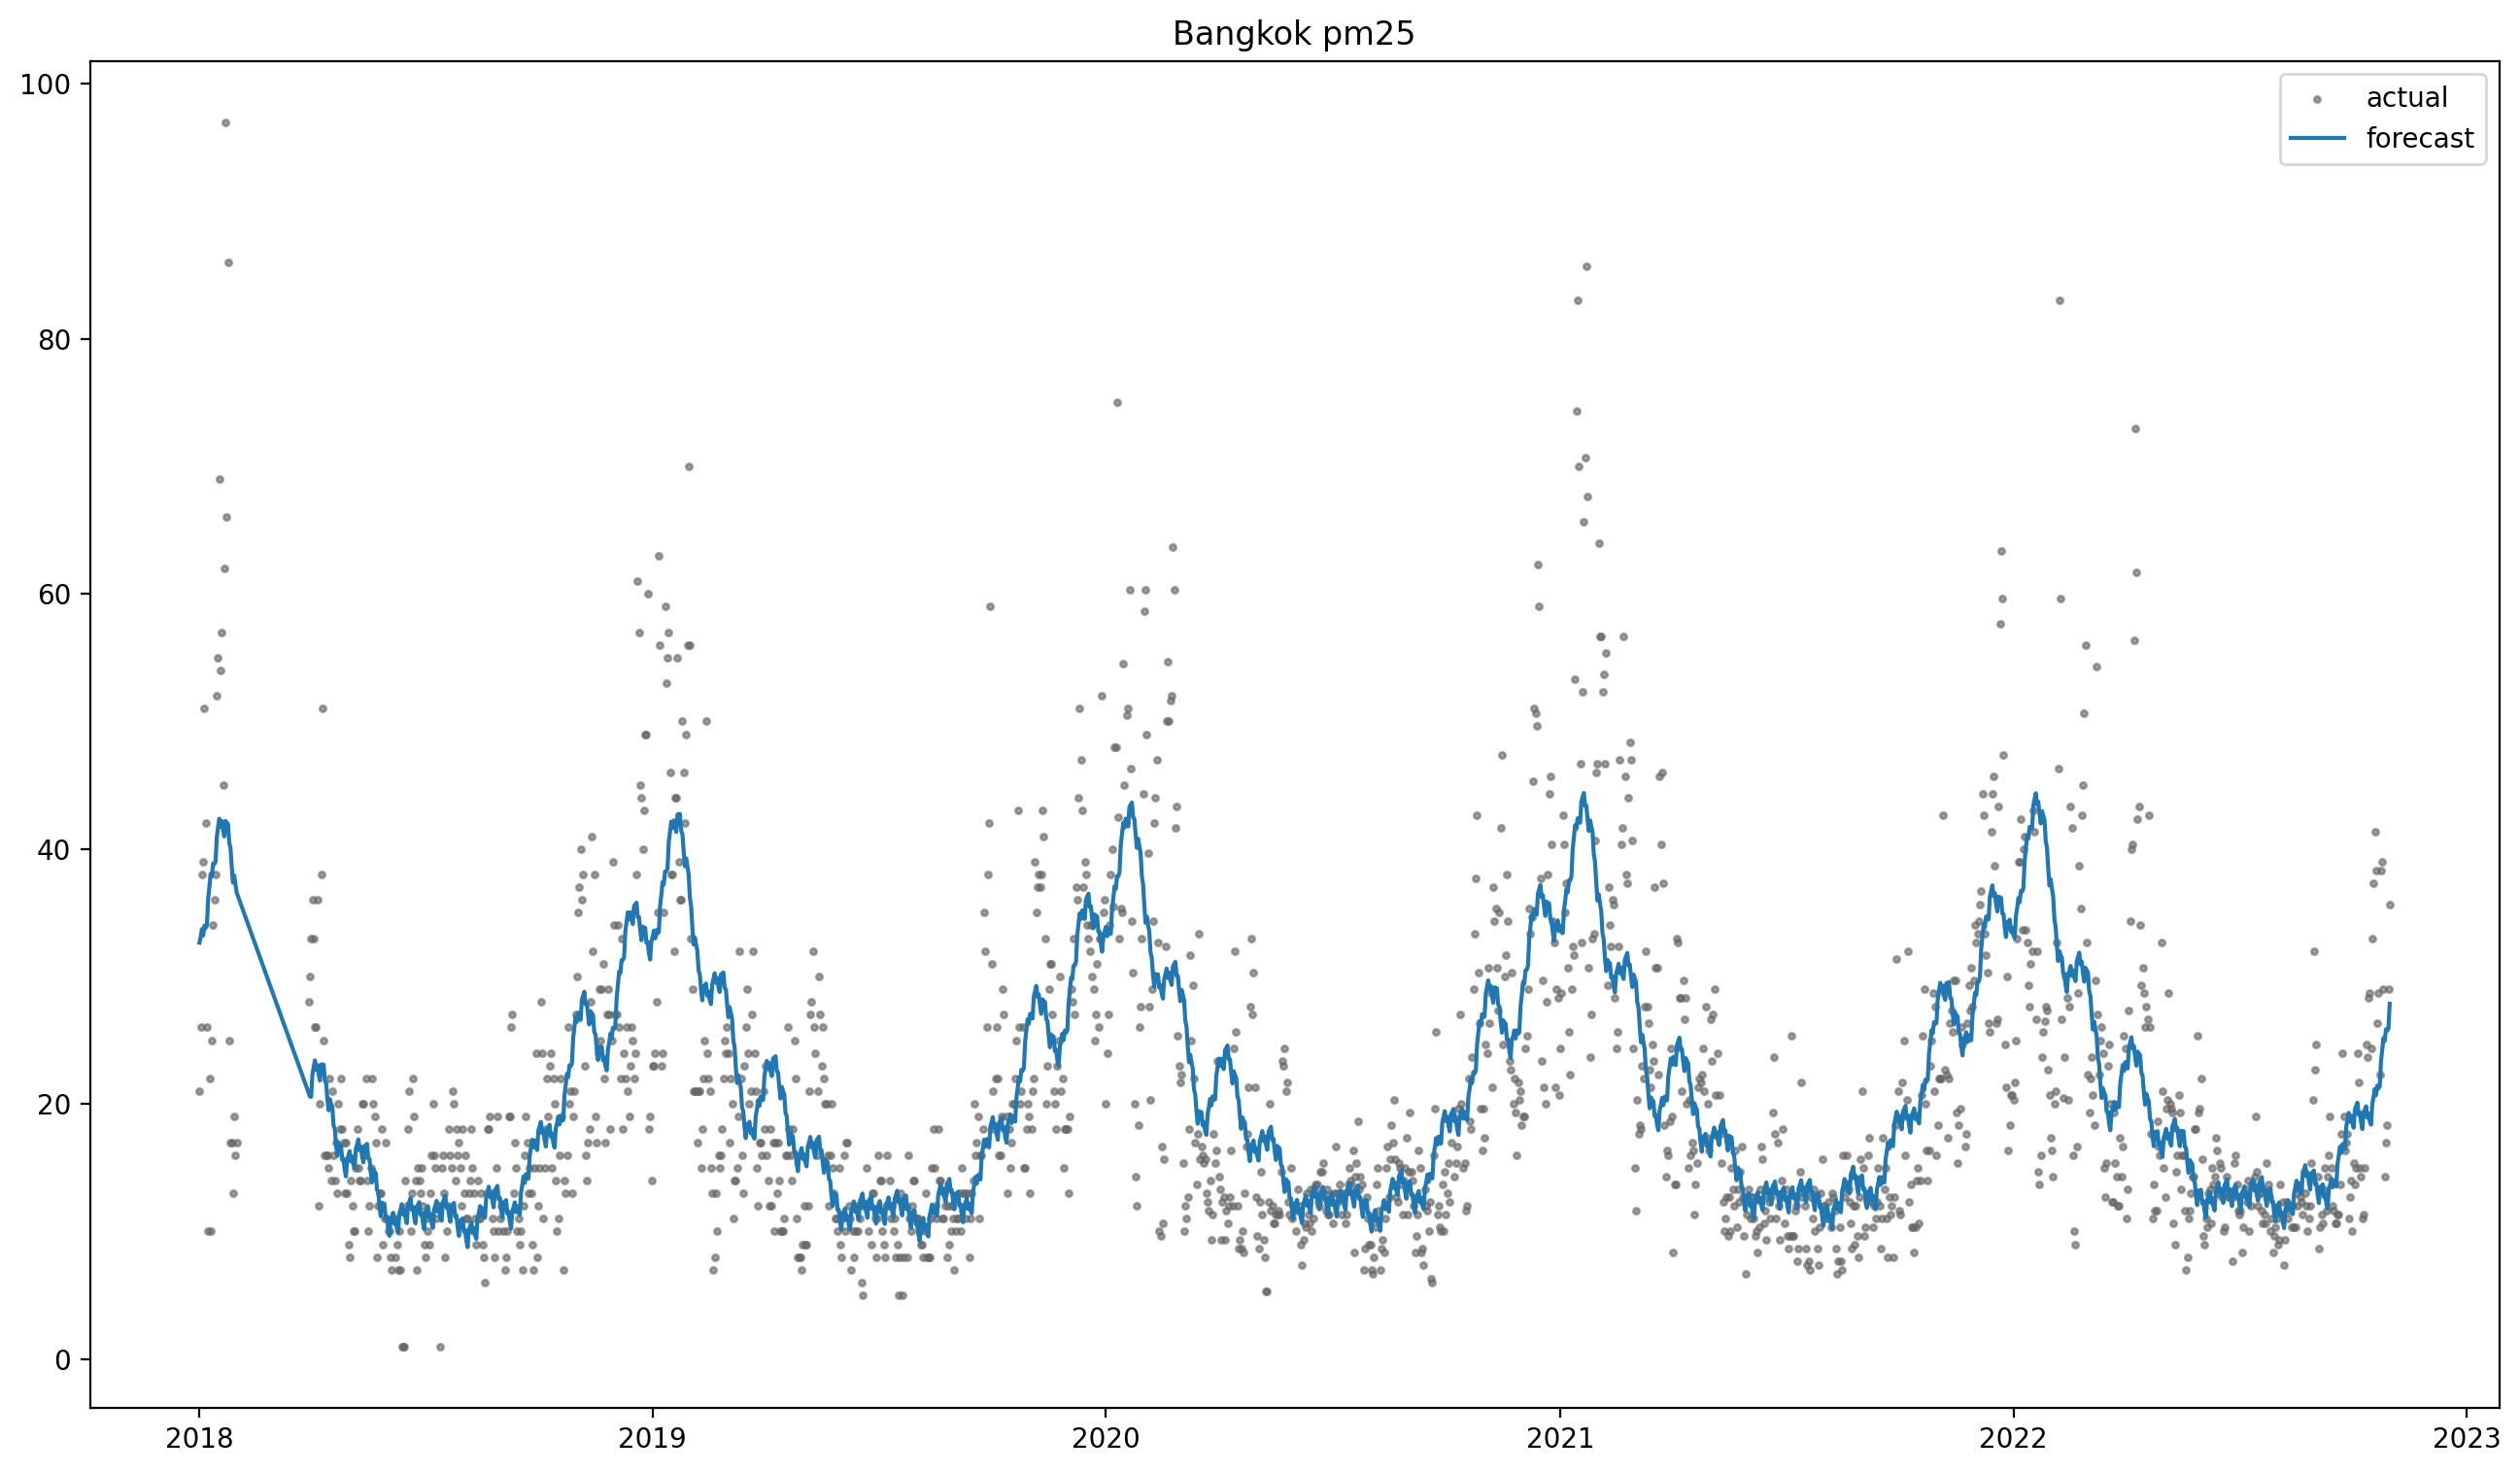

In [87]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Bangkok {y_col}')
plt.legend();

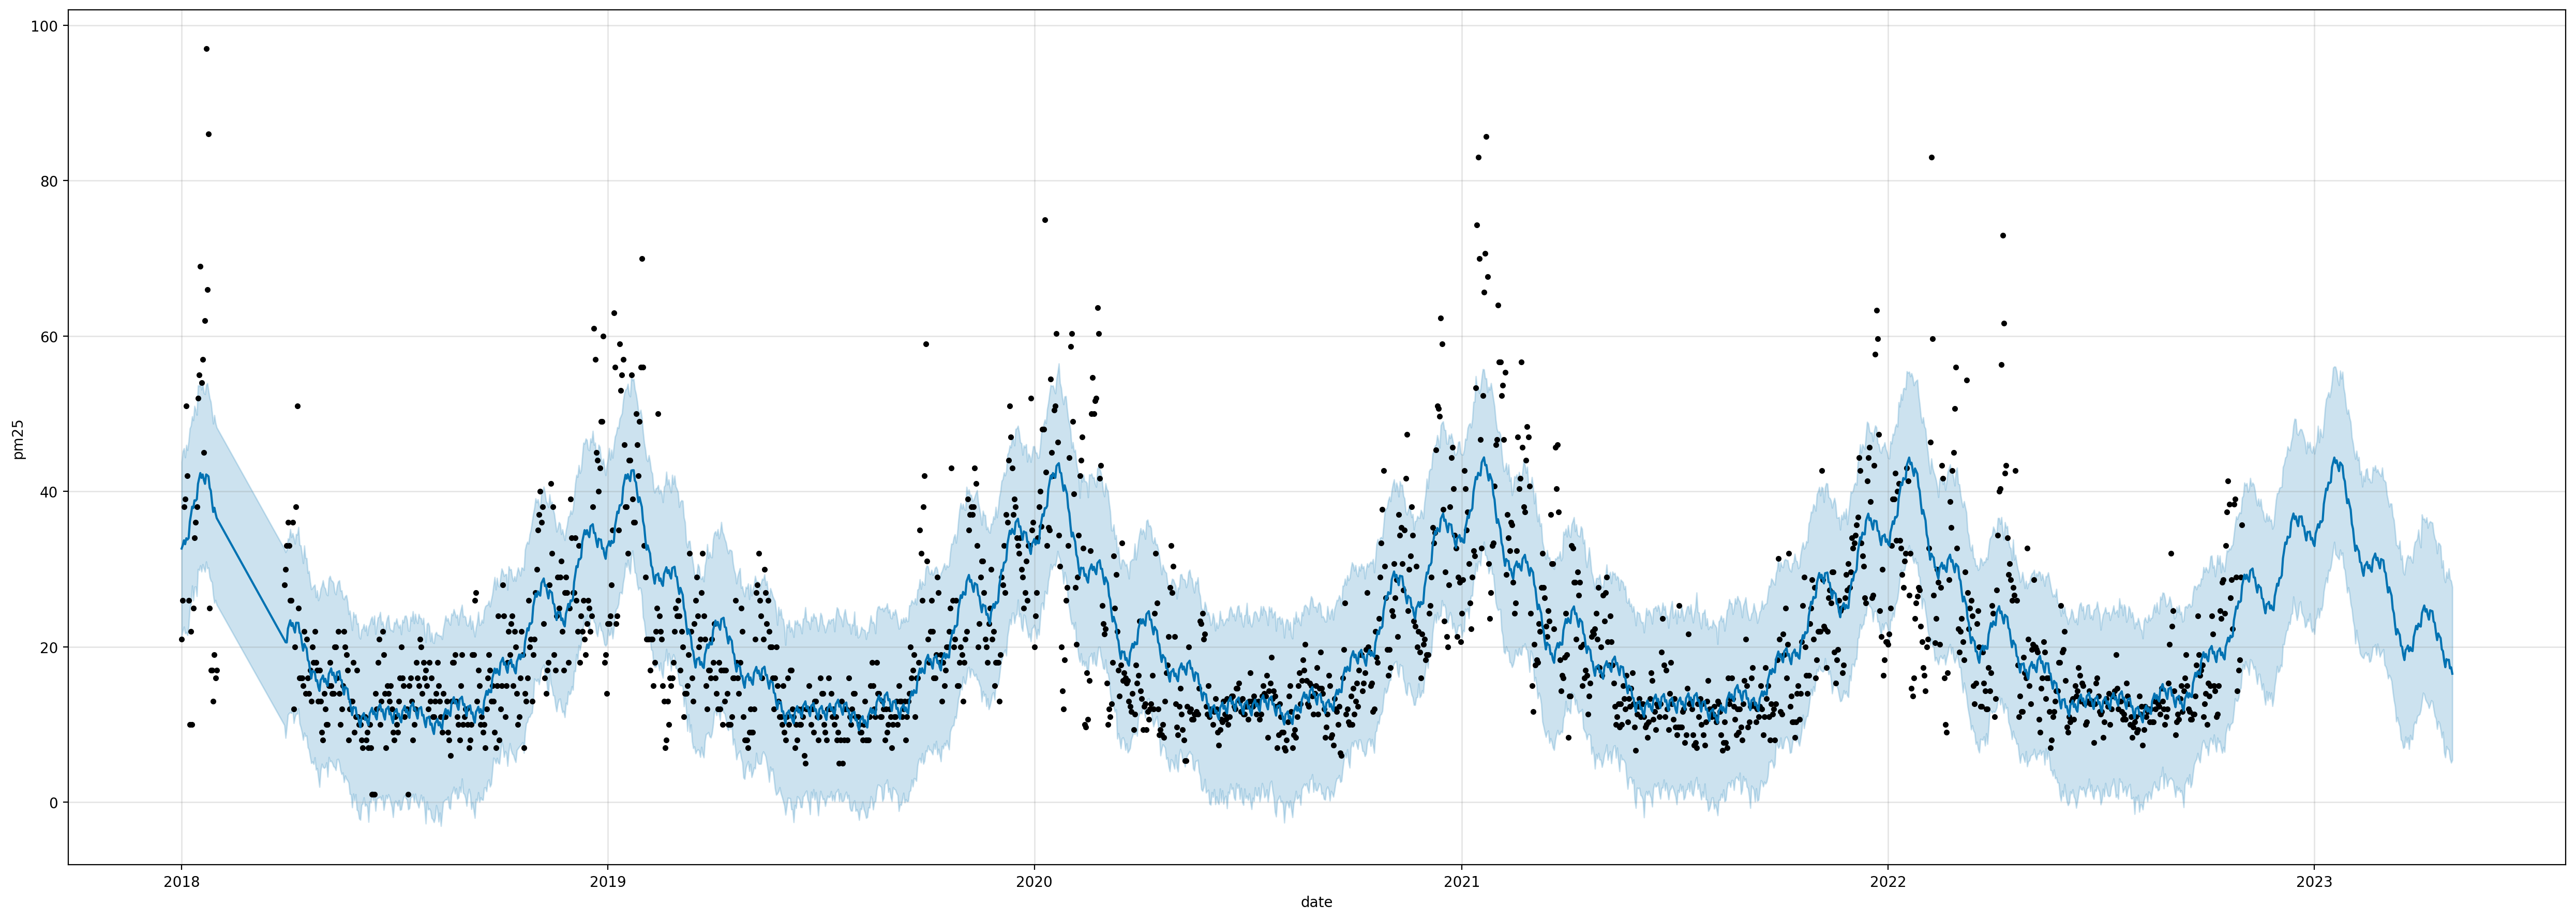

In [88]:
fig=model.plot(forecast, uncertainty=True, figsize=(25, 9), xlabel='date', ylabel=y_col)

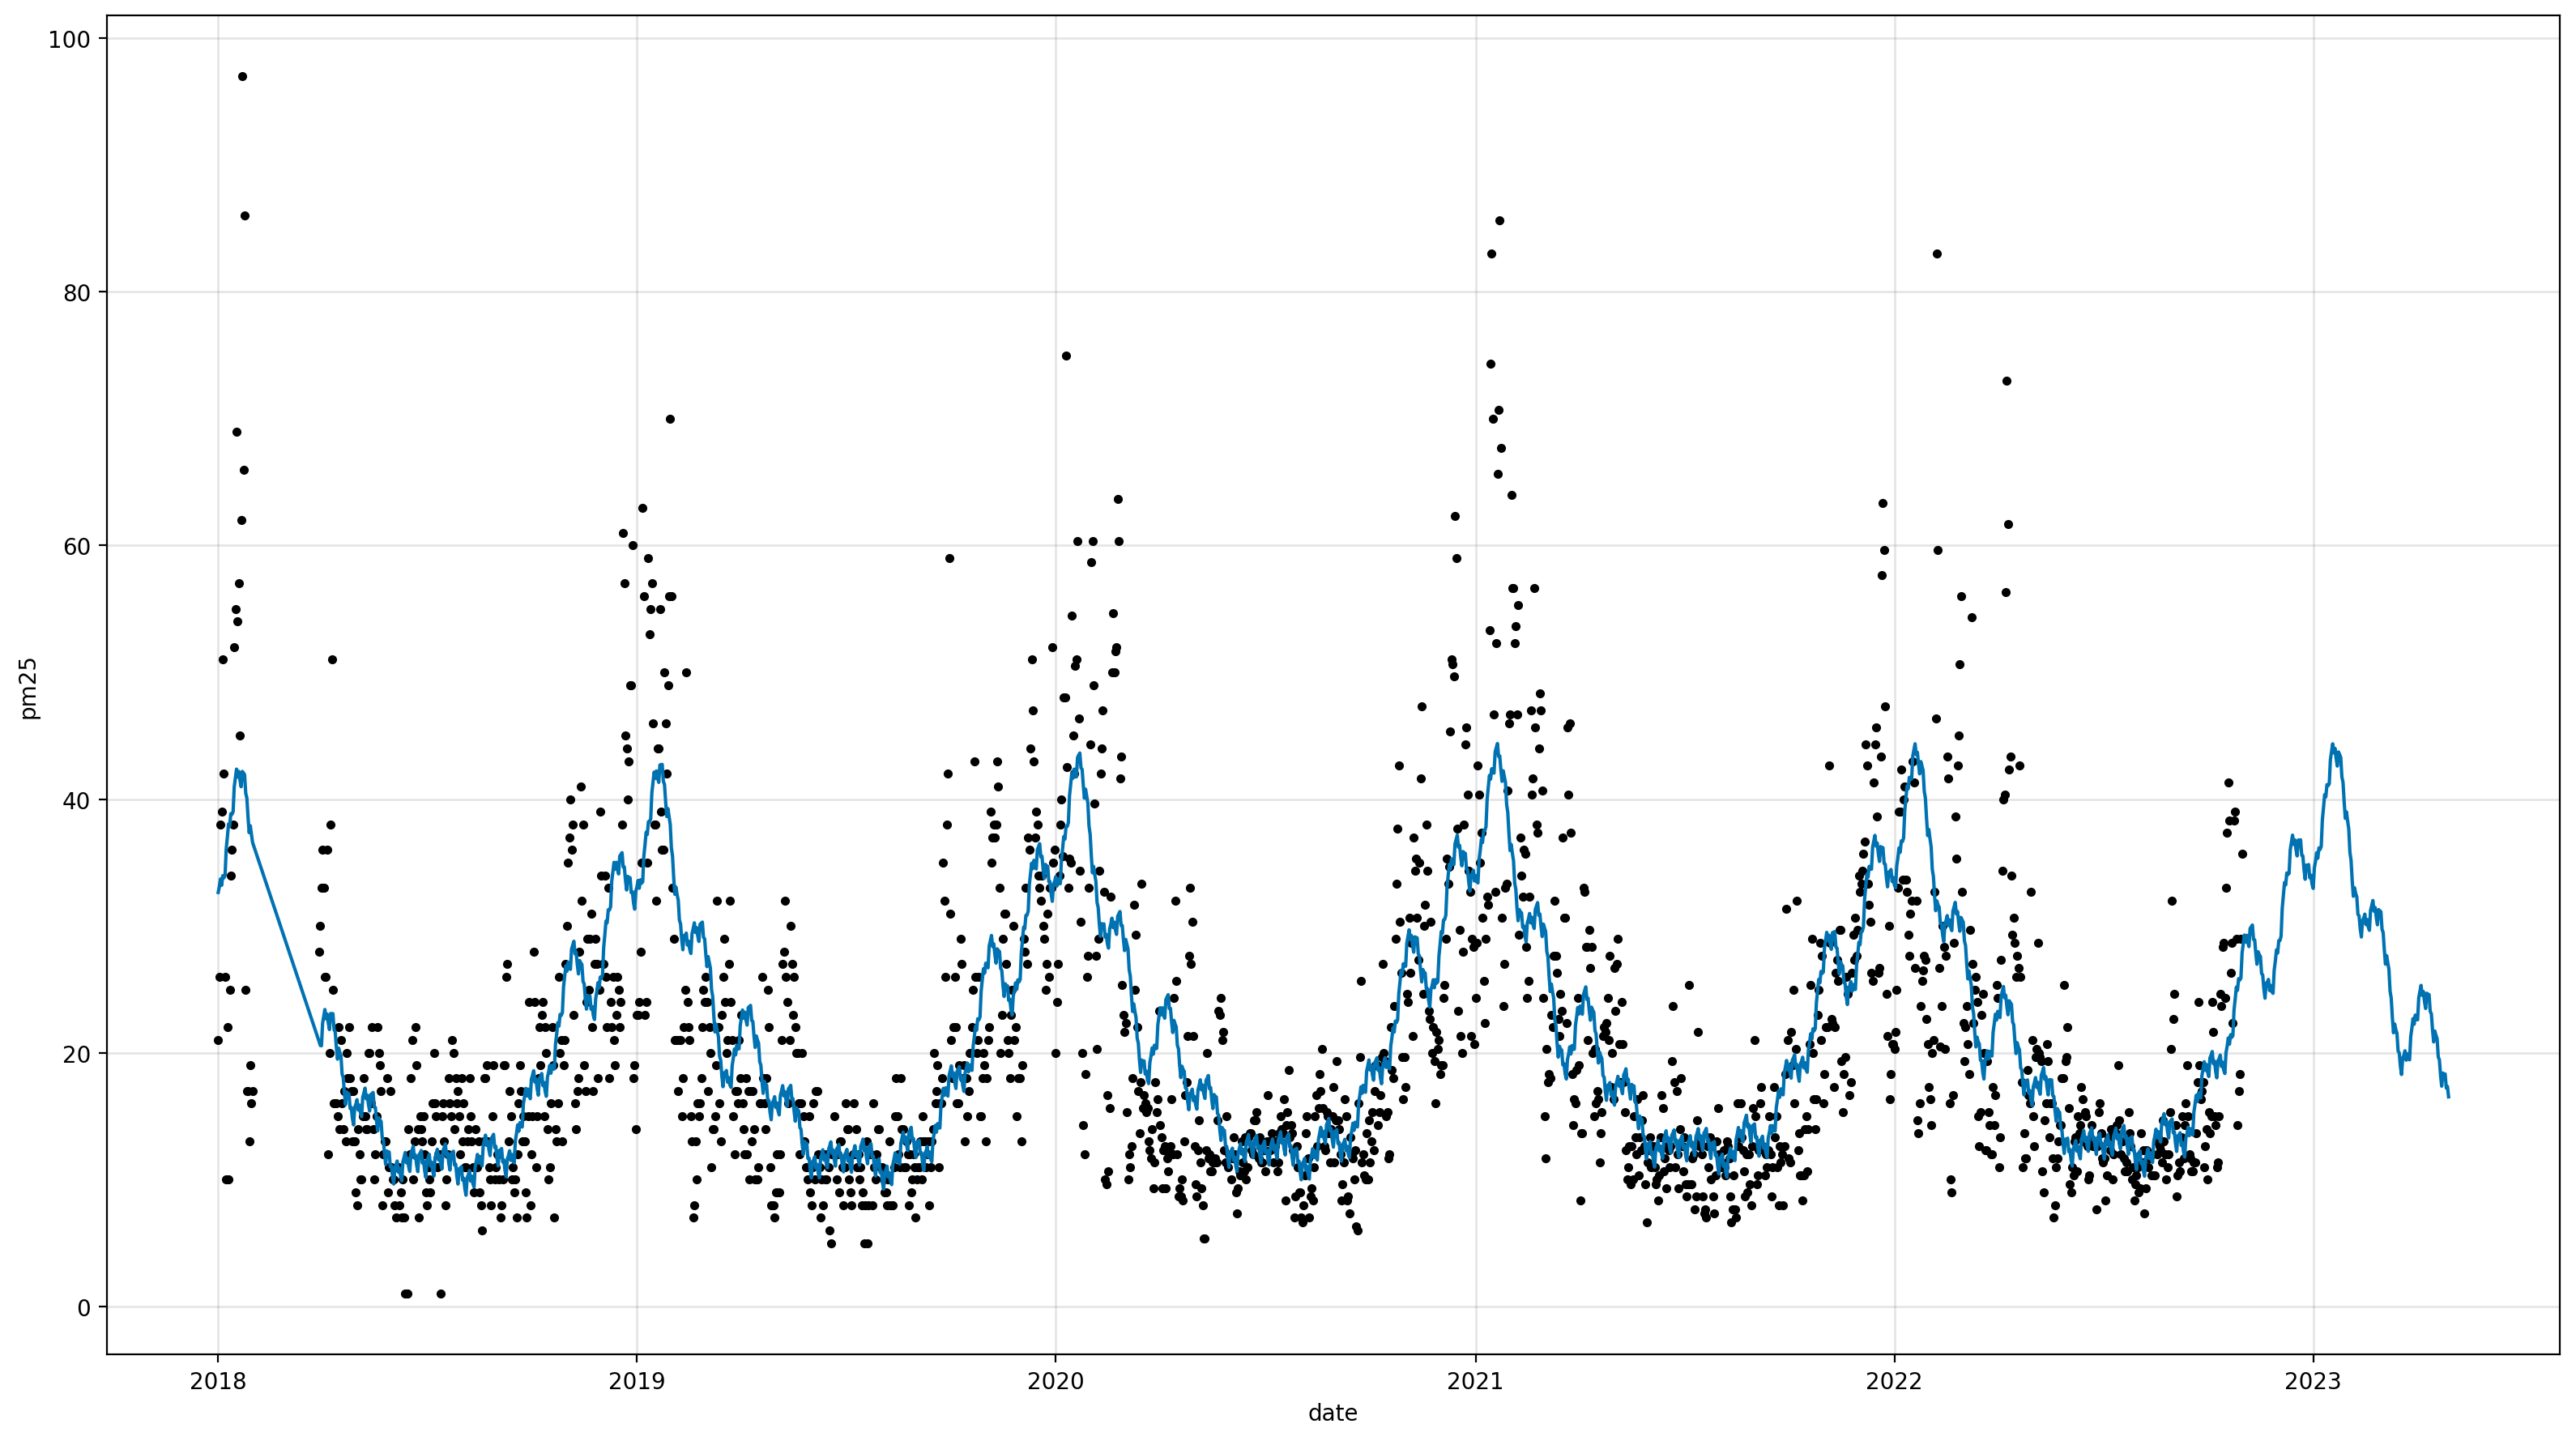

In [89]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [90]:
dfcstnew = forecast.tail(180)

In [91]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

ds       yhat
1708 2022-11-01  28.559894
1709 2022-11-02  29.284452
1710 2022-11-03  28.729167
1711 2022-11-04  29.271251
1712 2022-11-05  28.718974
...         ...        ...
1883 2023-04-25  18.301291
1884 2023-04-26  18.337785
1885 2023-04-27  17.228398
1886 2023-04-28  17.356215
1887 2023-04-29  16.531681

[180 rows x 2 columns]

In [92]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0)
ypred

ds  yhat
1708 2022-11-01  29.0
1709 2022-11-02  29.0
1710 2022-11-03  29.0
1711 2022-11-04  29.0
1712 2022-11-05  29.0
...         ...   ...
1883 2023-04-25  18.0
1884 2023-04-26  18.0
1885 2023-04-27  17.0
1886 2023-04-28  17.0
1887 2023-04-29  17.0

[180 rows x 2 columns]

In [93]:
ypred.mean().round(0)

yhat    30.0
dtype: float64

In [94]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [95]:
metric_df = forecast.set_index('ds')[['yhat']].join(df3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [96]:
mse3 = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse3

80.51944024745012

In [97]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse3 = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse3) 
ans

8.973262519699851

In [98]:
#Xgboost

In [99]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [100]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
data = pd.read_csv('/content/drive/MyDrive/code/code/dataAir_mixavg.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1760 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1761 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1762 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1763 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1764 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1760     79           1009.24    120.0      9.0  
1761     72           1009.24    170.0      7.0  
1762     62           1009.24    120.0     13.0  
1763     62           1009.24    120.0     13.0  
1764     59           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1765 non-null   float64       
 2   co                1765 non-null   float64       
 3   no                1765 non-null   float64       
 4   no2               1765 non-null   float64       
 5   nox               1765 non-null   float64       
 6   pm25              1708 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [104]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1760 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1761 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1762 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1763 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1764 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1760     79           1009.24    120.0      9.0  
1761     72           1009.24    170.0      7.0  
1762     62           1009.24    120.0     13.0  
1763     62           1009.24    120.0     13.0  
1764     59           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [105]:
y_col='pm25'

In [106]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1703 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1704 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1705 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1706 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1707 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  
0        70           1009.40    100.0      9.0  
1        67           1009.40    120.0      4.0  
2        66           1009.40     60.0      4.0  
3        64           1009.40    330.0      6.0  
4        63           1009.40      NaN      NaN  
...     ...               ...      ...      ...  
1703     79           1009.24    120.0      9.0  
1704     72           1009.24    170.0      7.0  
1705     62           1009.24    120.0     13.0  
1706     62           1009.24    120.0     13.0  
1707     59           1009.24      NaN      NaN  

[1708 rows x 12 columns]

In [107]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [108]:
date_parts(data)

In [109]:
data

date       pm10     co      no    no2      nox       pm25  avgT  \
0    2018-01-01  48.645833  0.985  74.200  29.33  119.500  21.000000  27.1   
1    2018-01-02  57.020833  1.015  73.000  35.13  124.200  26.000000  27.5   
2    2018-01-03  73.854167  1.290  98.500  43.54  156.500  38.000000  28.2   
3    2018-01-04  85.062500  1.310  92.400  42.46  155.200  39.000000  29.3   
4    2018-01-05  91.812500  1.175  51.100  48.80  111.900  51.000000  30.4   
...         ...        ...    ...     ...    ...      ...        ...   ...   
1703 2022-10-27  50.000000  1.000  71.465  27.80   99.315  14.333333  28.5   
1704 2022-10-28  57.666667  1.100  84.335  31.65  115.985  17.000000  29.6   
1705 2022-10-29  58.000000  0.900  56.865  33.90   90.775  18.333333  29.5   
1706 2022-10-30  72.666667  1.100  56.145  44.90  101.030  29.000000  30.0   
1707 2022-10-31  71.000000  1.150  52.335  46.10   98.455  35.666667   NaN   

      humid  pressure-monthly  windDir  windSpd  year  month  day   day_name  
0        70           1009.40    100.0      9.0  2018      1    1     Monday  
1        67           1009.40    120.0      4.0  2018      1    2    Tuesday  
2        66           1009.40     60.0      4.0  2018      1    3  Wednesday  
3        64           1009.40    330.0      6.0  2018      1    4   Thursday  
4        63           1009.40      NaN      NaN  2018      1    5     Friday  
...     ...               ...      ...      ...   ...    ...  ...        ...  
1703     79           1009.24    120.0      9.0  2022     10   27   Thursday  
1704     72           1009.24    170.0      7.0  2022     10   28     Friday  
1705     62           1009.24    120.0     13.0  2022     10   29   Saturday  
1706     62           1009.24    120.0     13.0  2022     10   30     Sunday  
1707     59           1009.24      NaN      NaN  2022     10   31     Monday  

[1708 rows x 16 columns]

In [110]:
data.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [111]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

date  year  month  day   day_name       pm25
0    2018-01-01  2018      1    1     Monday  21.000000
1    2018-01-02  2018      1    2    Tuesday  26.000000
2    2018-01-03  2018      1    3  Wednesday  38.000000
3    2018-01-04  2018      1    4   Thursday  39.000000
4    2018-01-05  2018      1    5     Friday  51.000000
...         ...   ...    ...  ...        ...        ...
1703 2022-10-27  2022     10   27   Thursday  14.333333
1704 2022-10-28  2022     10   28     Friday  17.000000
1705 2022-10-29  2022     10   29   Saturday  18.333333
1706 2022-10-30  2022     10   30     Sunday  29.000000
1707 2022-10-31  2022     10   31     Monday  35.666667

[1708 rows x 6 columns]

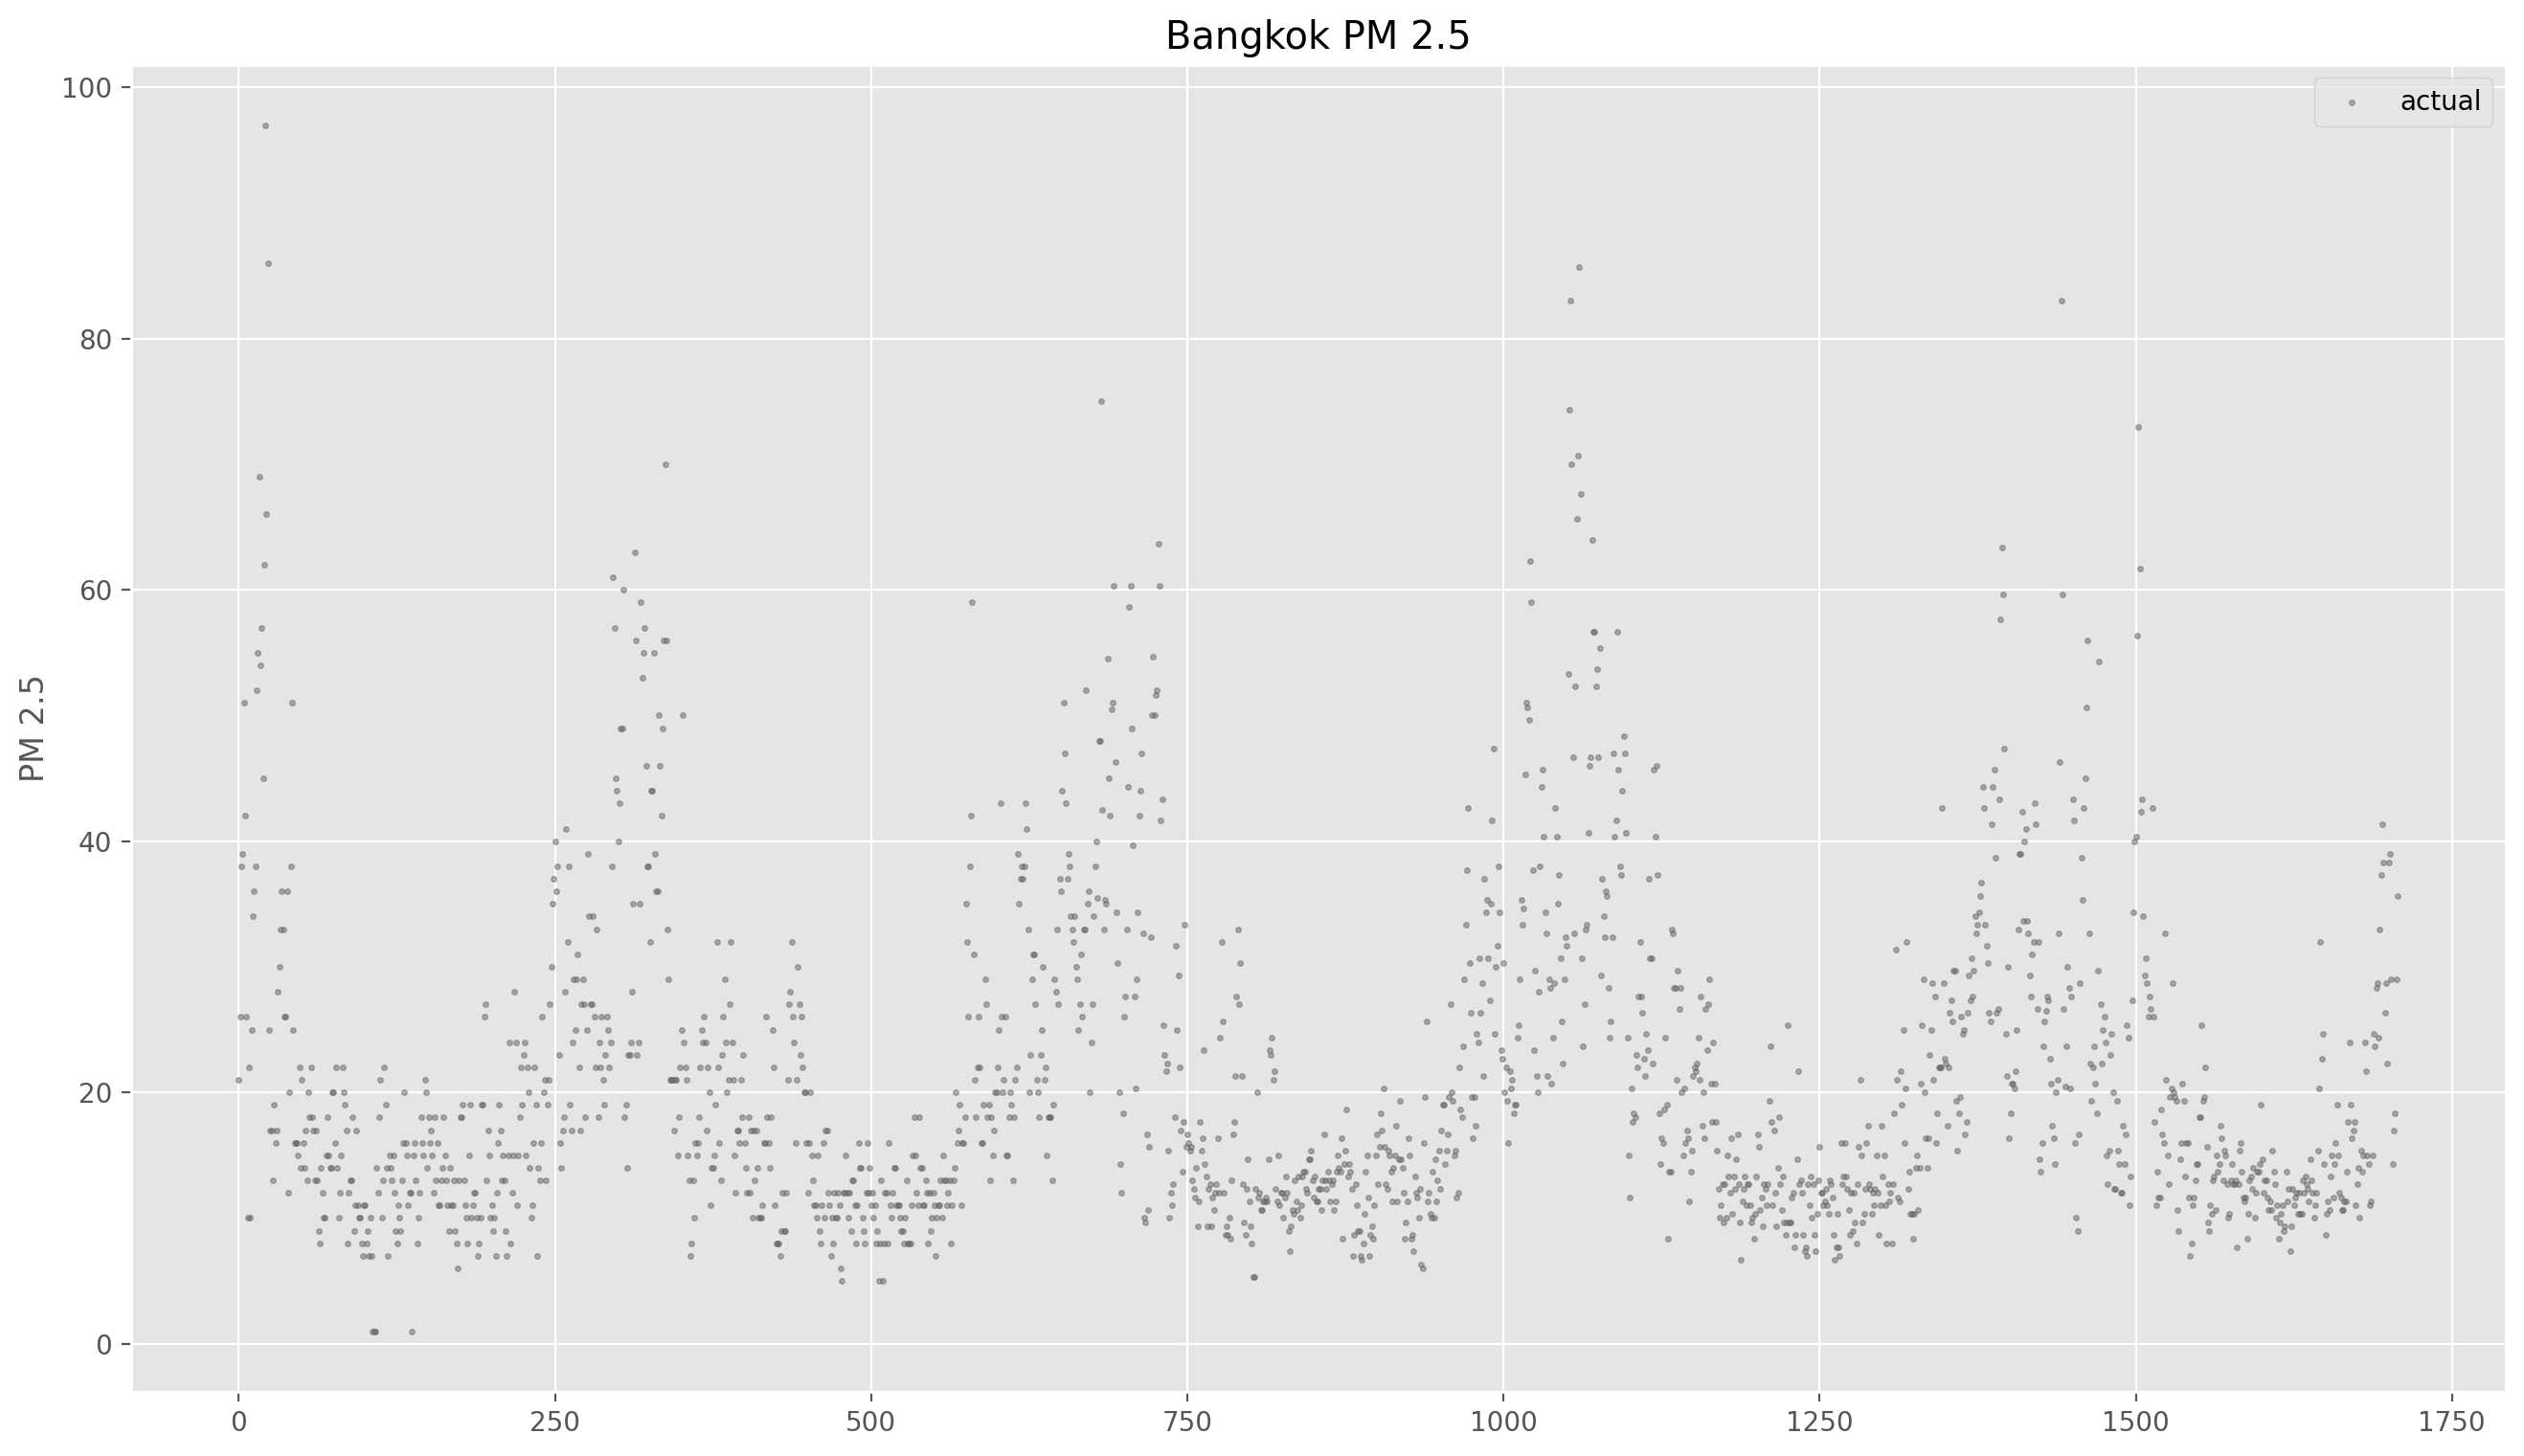

In [112]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [113]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [114]:
df=data.copy()
df['y']=df['pm25'].shift(-1)

In [115]:
train=df[:-1500]
test=df[-1500:]
test=test.drop(test.tail(1).index)

In [116]:
X_train1 = train['y'].values.reshape(-1,1)
y_test1 = test['pm25'].values.reshape(-1,1)
y_train1 = train['y'].values.reshape(-1,1)
X_test1 =test['pm25'].values.reshape(-1,1)

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X=X_train1, y=y_train1.ravel())
reg_pred = reg.predict(X_test1)
test['gbr_pred'] = reg_pred
test

date       pm10        co      no        no2      nox       pm25  \
208  2018-09-23  59.527778  1.766667  55.075  19.983333   75.130  13.000000   
209  2018-09-24  72.069444  1.550000  75.745  23.000000   99.035  15.000000   
210  2018-09-25  62.305556  1.493333  47.575  20.030000   69.550  13.000000   
211  2018-09-26  37.680556  1.273333  31.935  15.476667   48.285   9.000000   
212  2018-09-27  41.208333  1.886667  38.130  14.360000   52.130   7.000000   
...         ...        ...       ...     ...        ...      ...        ...   
1702 2022-10-26  77.333333  1.300000  75.690  48.450000  124.145  29.000000   
1703 2022-10-27  50.000000  1.000000  71.465  27.800000   99.315  14.333333   
1704 2022-10-28  57.666667  1.100000  84.335  31.650000  115.985  17.000000   
1705 2022-10-29  58.000000  0.900000  56.865  33.900000   90.775  18.333333   
1706 2022-10-30  72.666667  1.100000  56.145  44.900000  101.030  29.000000   

      avgT  humid  pressure-monthly  windDir  windSpd  year  month  day  \
208   30.3     85           1007.37    150.0      6.0  2018      9   23   
209   27.3     94           1007.37    120.0      6.0  2018      9   24   
210   30.4     83           1007.37    270.0      9.0  2018      9   25   
211   30.3     77           1007.37    230.0      7.0  2018      9   26   
212   31.5     80           1007.37    150.0      5.0  2018      9   27   
...    ...    ...               ...      ...      ...   ...    ...  ...   
1702  30.3     69           1009.24    110.0      7.0  2022     10   26   
1703  28.5     79           1009.24    120.0      9.0  2022     10   27   
1704  29.6     72           1009.24    170.0      7.0  2022     10   28   
1705  29.5     62           1009.24    120.0     13.0  2022     10   29   
1706  30.0     62           1009.24    120.0     13.0  2022     10   30   

       day_name          y   gbr_pred  
208      Sunday  15.000000  13.000131  
209      Monday  13.000000  14.999957  
210     Tuesday   9.000000  13.000131  
211   Wednesday   7.000000   9.000757  
212    Thursday  15.000000   7.001667  
...         ...        ...        ...  
1702  Wednesday  14.333333  28.014079  
1703   Thursday  17.000000  14.000051  
1704     Friday  18.333333  16.999840  
1705   Saturday  29.000000  17.999682  
1706     Sunday  35.666667  28.014079  

[1499 rows x 18 columns]

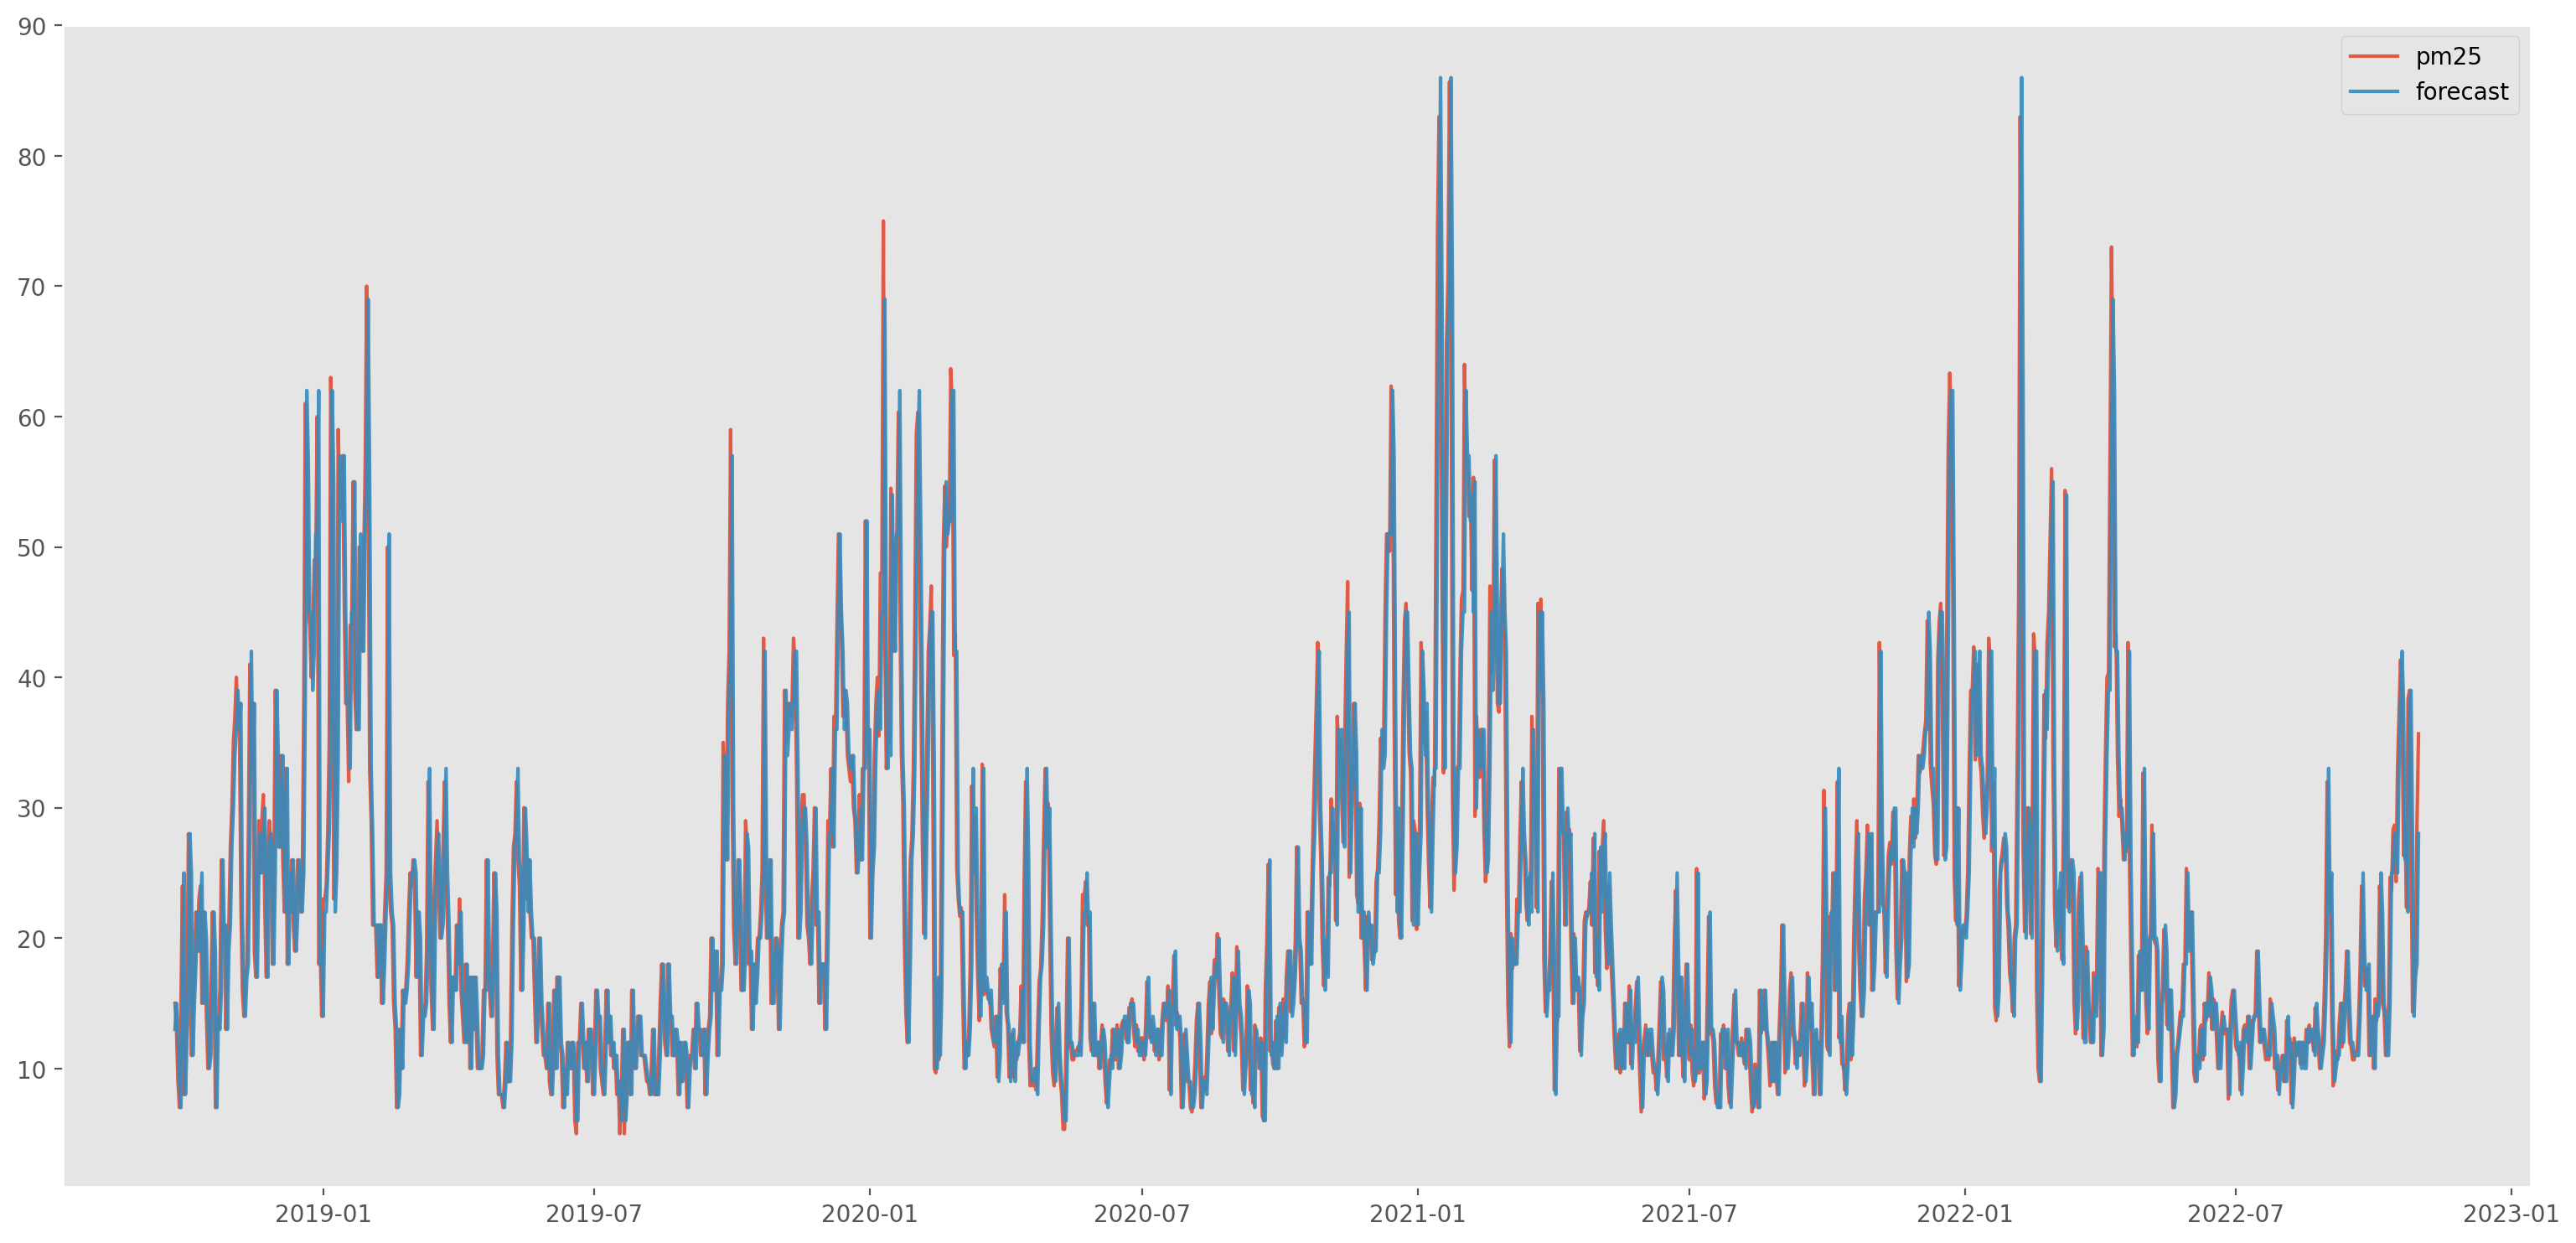

In [118]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

In [119]:
reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [120]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [121]:
reg.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': 42,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_in_': 1,
 '_loss': <sklearn.ensemble._gb_losses.LeastSquaresError at 0x7f7768c3b910>,
 'max_features_': 1,
 'init_': DummyRegressor(),
 'estimators_': array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F7766360C40)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F7766360C40)],
        [DecisionTreeRegressor(criterion='fried

In [122]:
yhat=[]
yhat = reg.predict(X_test1)

In [123]:
Y_Pred=reg.predict(X_test1)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test1,Y_Pred)
print('Mse',mse)
rmse = np.sqrt(mse)
print('Rmse',rmse)

Mse 0.34057123360619607
Rmse 0.5835848126932331


In [124]:
fig = plt.figure()      
ax = fig   

<Figure size 2000x1000 with 0 Axes>

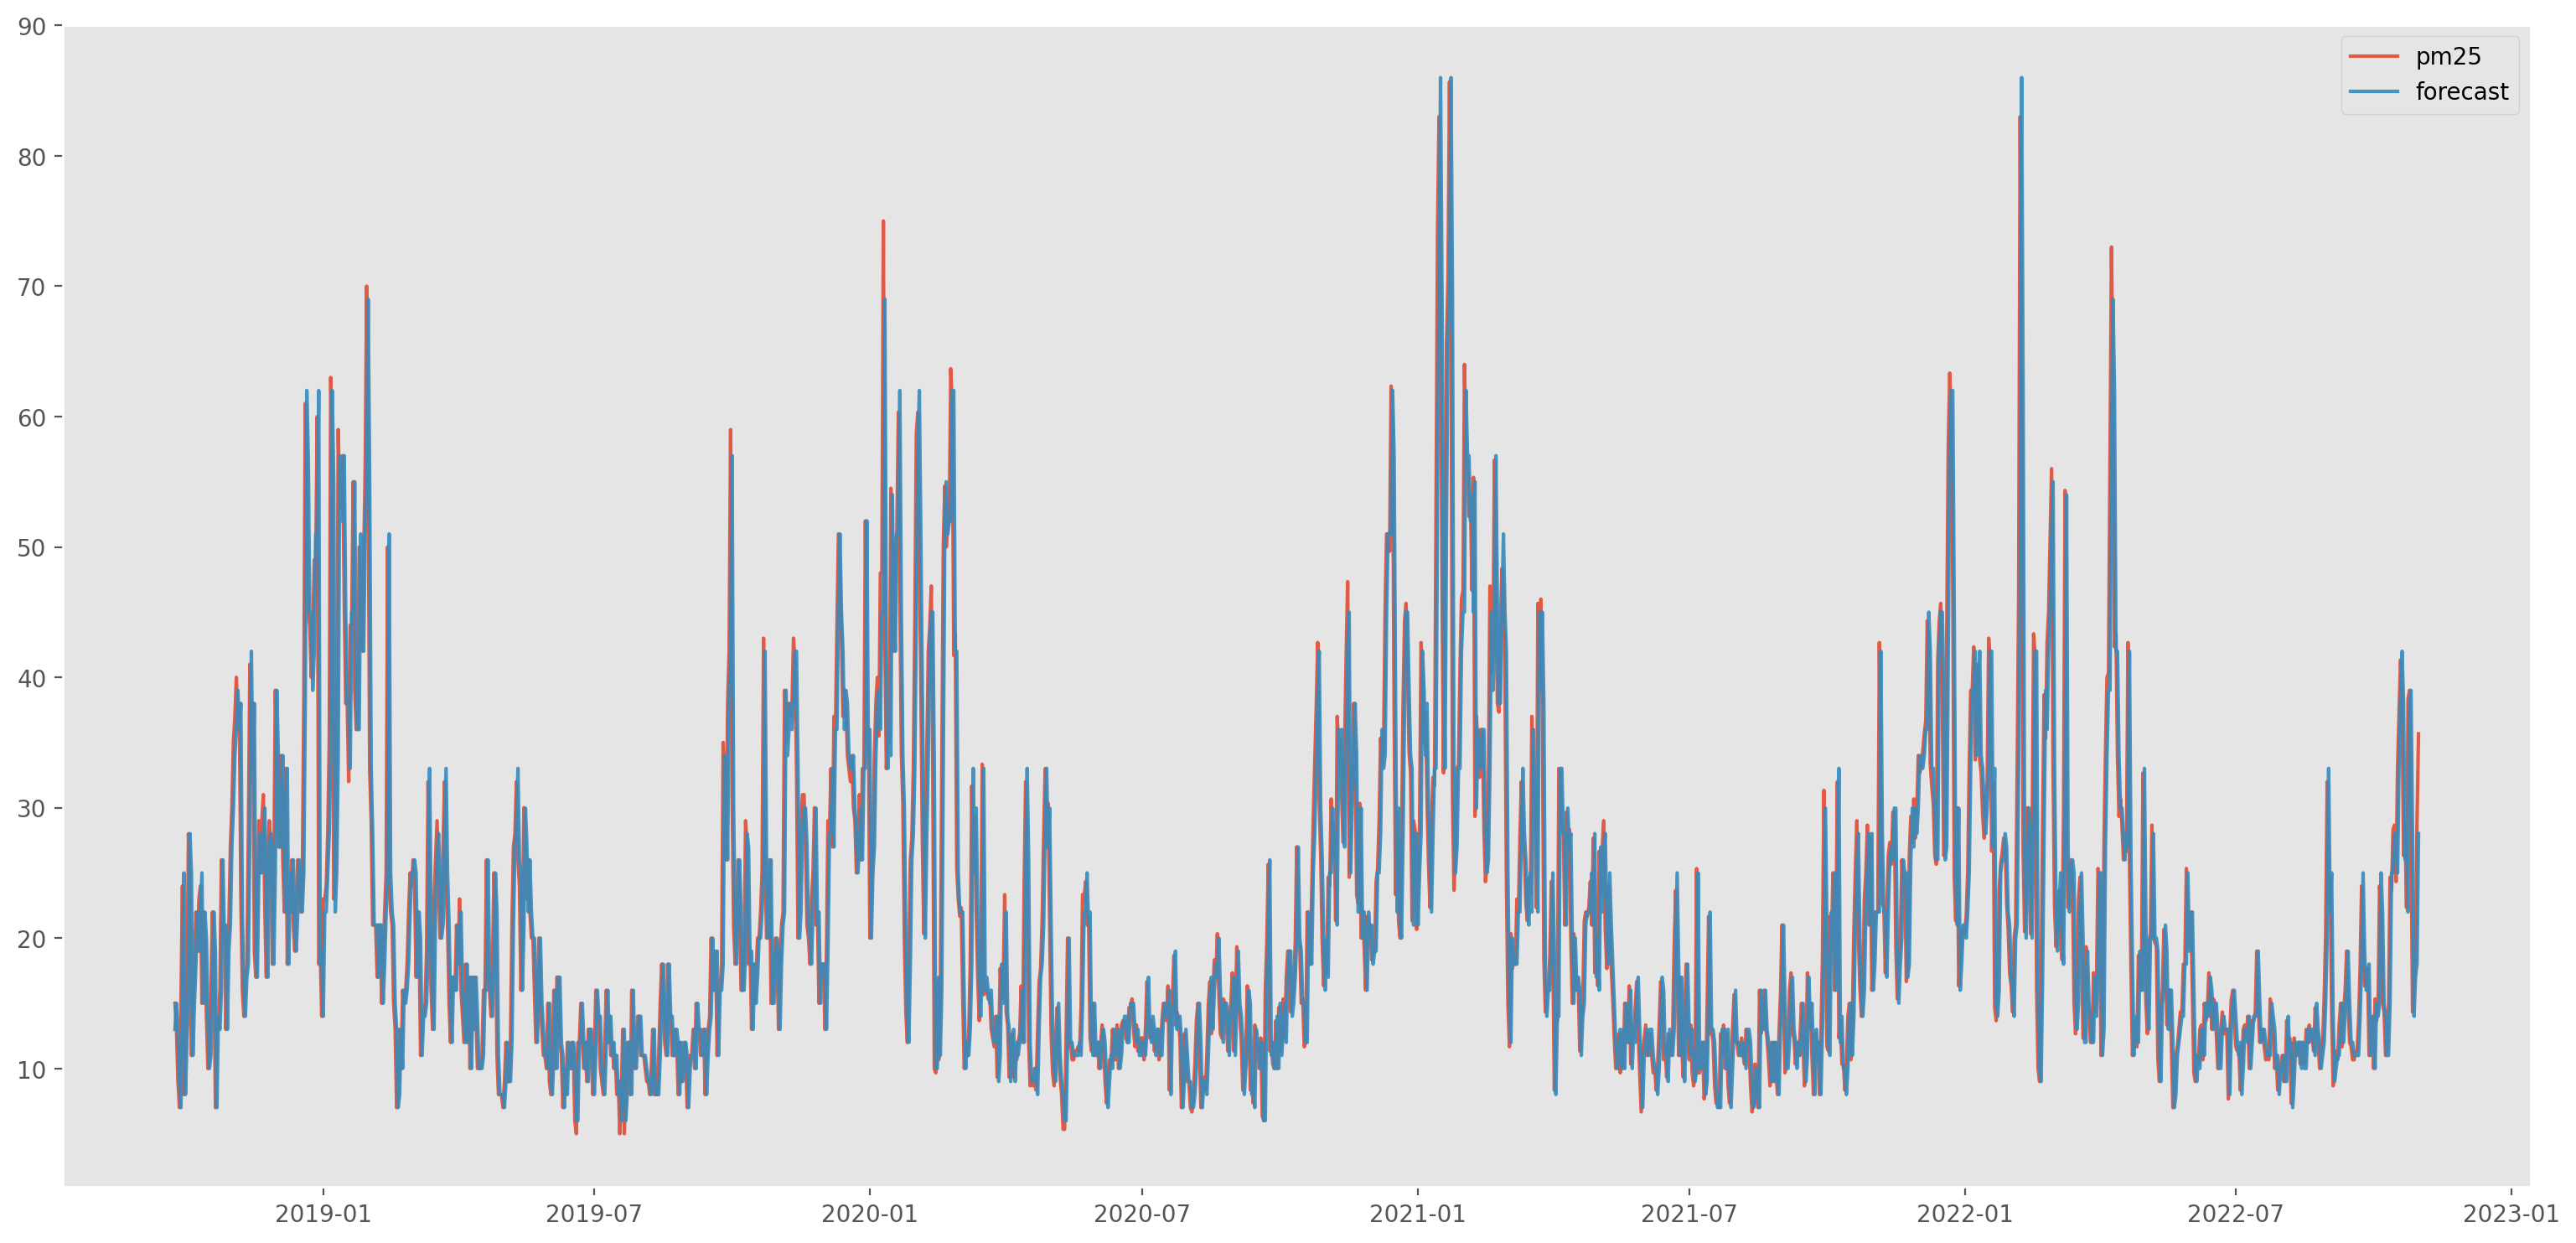

In [125]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

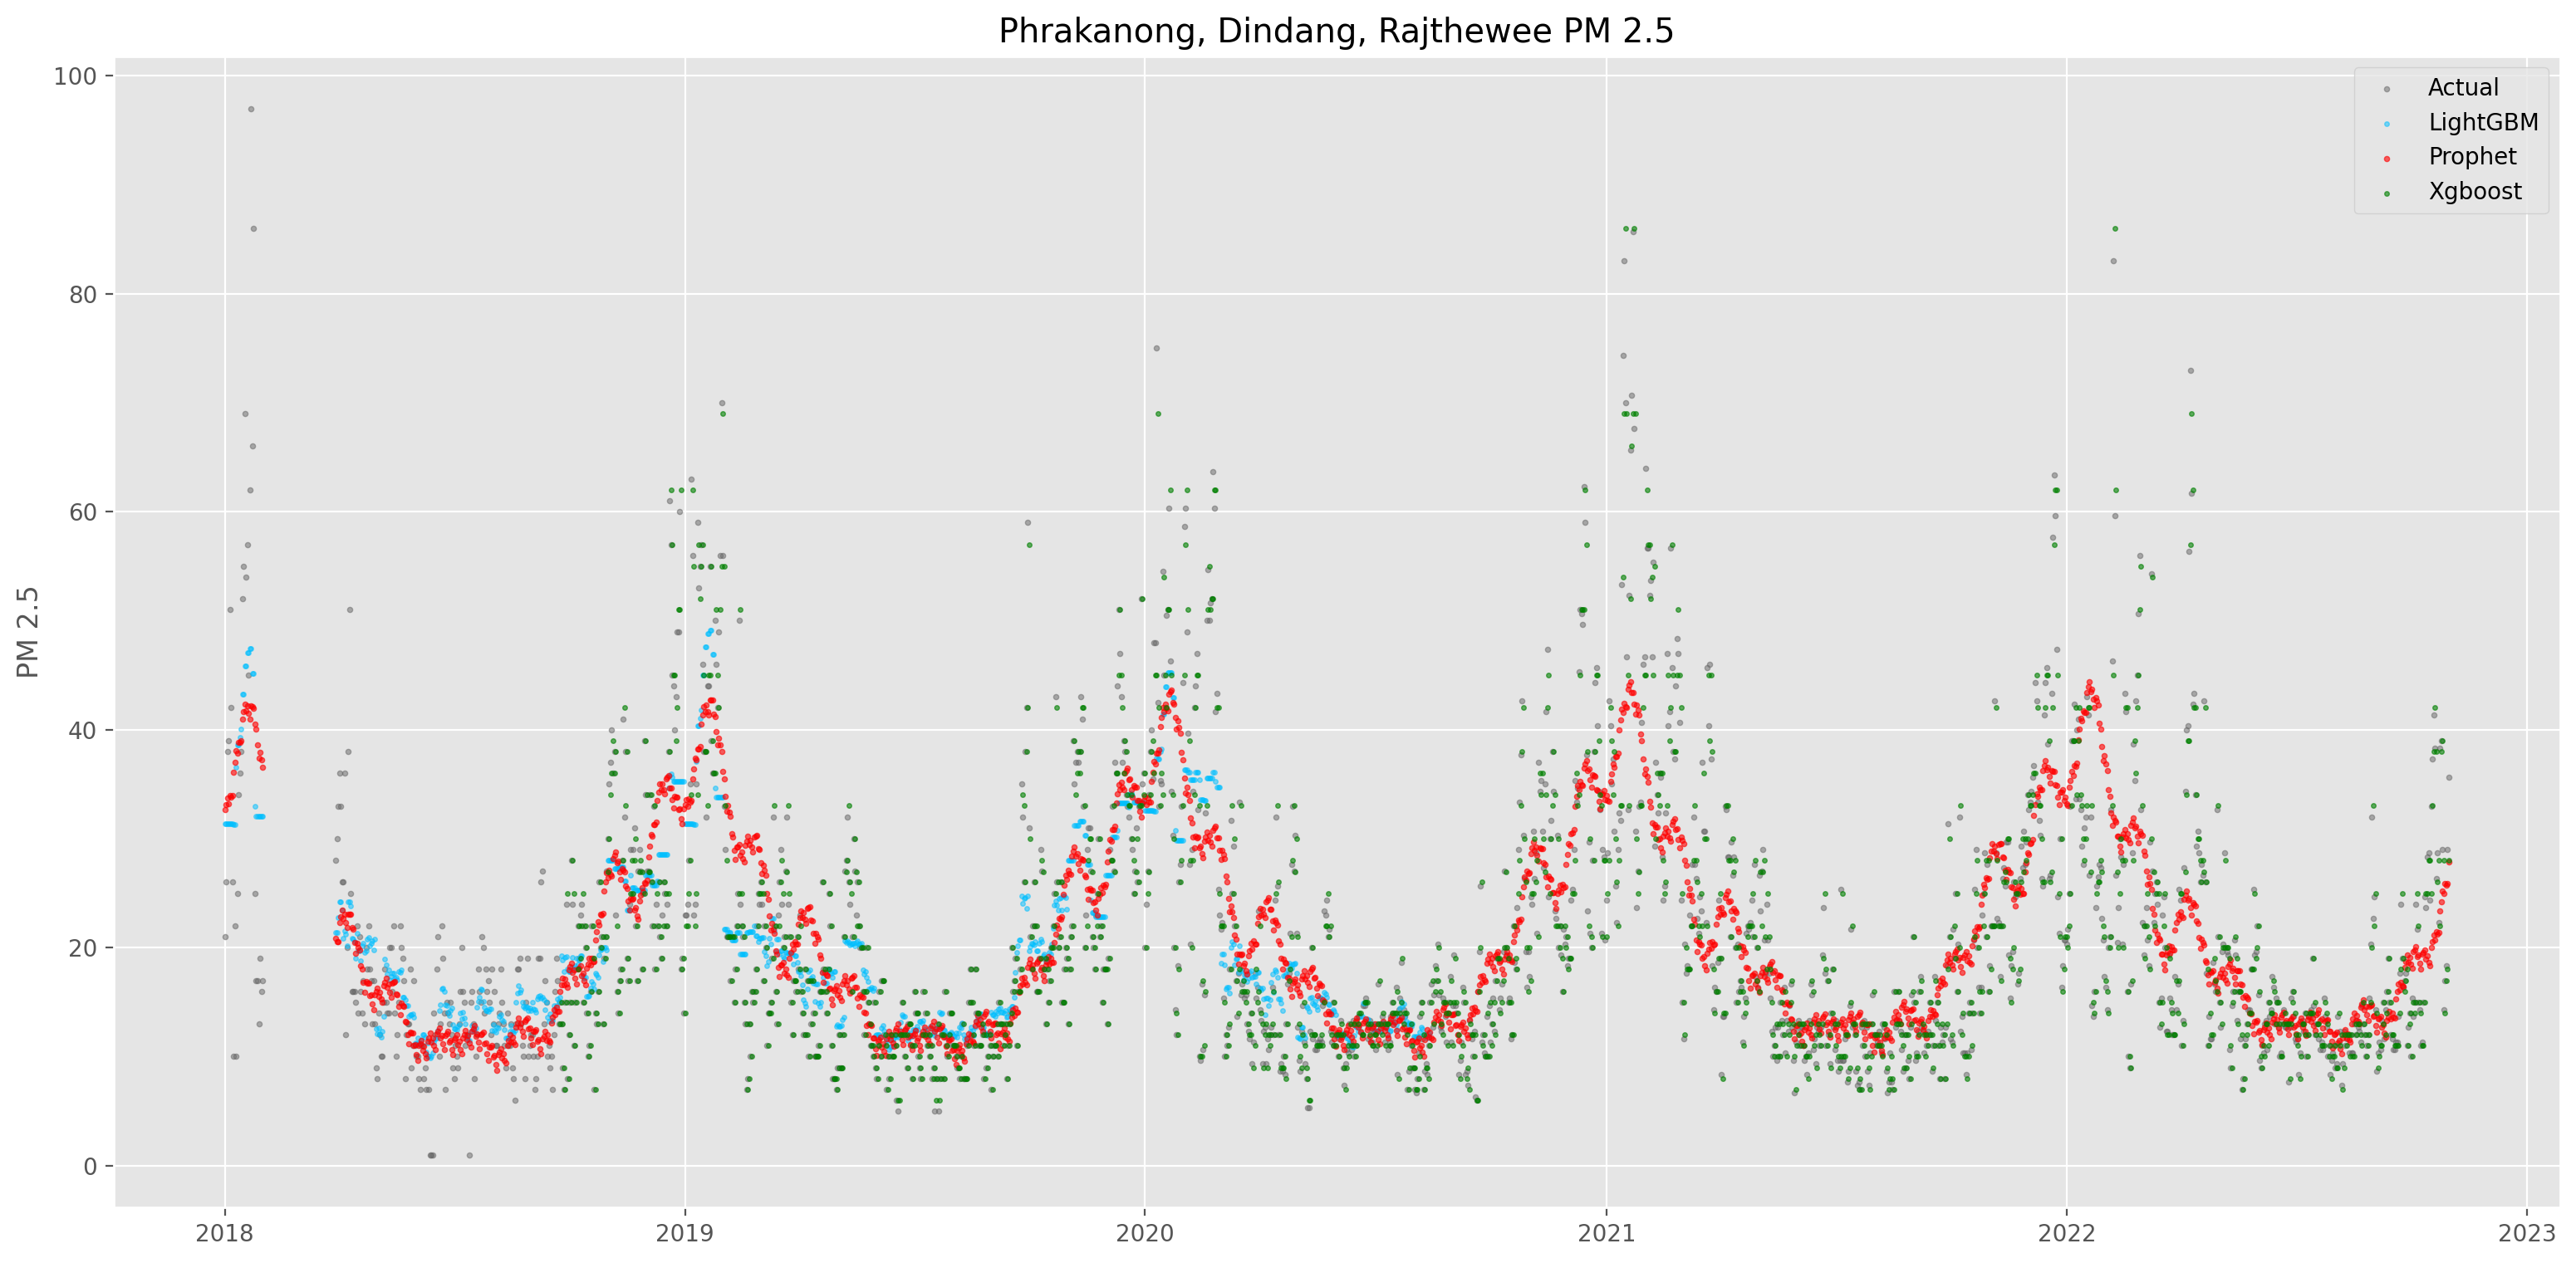

In [130]:
# กราฟ train LightGBM, Prophet, Xgboot
plt.figure(figsize=(19, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, label='Actual', s=5,color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='LightGBM', color='deepskyblue')
plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='red')
plt.scatter('date',dtype,data=fc,alpha=.6,s=4,label='Xgboost', color='green')

plt.ylabel('PM 2.5')
plt.title('Phrakanong, Dindang, Rajthewee PM 2.5')
plt.legend();

#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange
#plt.scatter('date',dtype,data=fc,label='xgboost',alpha=.5 ,s=4,color='red')
#plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='blue')
#-------------
#plt.scatter(train.index, reg.predict(X_train1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(test.index, reg.predict(X_test1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='LightGBM_test', color='orange')
